# 绘图和可视化

In [1]:
import numpy as np
import pandas as pd

matplotlib是一个用于创建出版质量图表的桌面绘图包，
- 不仅支持各种操作系统上许多不同的GUI后端，
- 而且能将图片导出为各种常见的矢量图或光栅图：PDF,SVG,JPG,PNG,BMP,GIF等。

可以导入配置文件查看可用后端，不同的操作系统可用后端会有所差异。

In [2]:
import matplotlib.rcsetup as rcsetup
print(rcsetup.all_backends)

['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


|Backend	|Description|
|---|---|
|Qt5Agg	|Agg rendering in a Qt5 canvas (requires PyQt5). This backend can be activated in IPython with %matplotlib qt5.|
|pympl	|Agg rendering embedded in a Jupyter widget. (requires ipympl). This backend can be enabled in a Jupyter notebook with %matplotlib ipympl.|
|GTK3Agg|	Agg rendering to a GTK 3.x canvas (requires PyGObject, and pycairo or cairocffi). This backend can be activated in IPython with %matplotlib gtk3.|
|macosx	|Agg rendering into a Cocoa canvas in OSX. This backend can be activated in IPython with %matplotlib osx.|
|TkAgg|	Agg rendering to a Tk canvas (requires TkInter). This backend can be activated in IPython with %matplotlib tk.|
|nbAgg	|Embed an interactive figure in a Jupyter classic notebook. This backend can be enabled in Jupyter notebooks via %matplotlib notebook.|
|WebAgg	|On show() will start a tornado server with an interactive figure.|
|GTK3Cairo	|Cairo rendering to a GTK 3.x canvas (requires PyGObject, and pycairo or cairocffi).|
|Qt4Agg	|Agg rendering to a Qt4 canvas (requires PyQt4 or pyside). This backend can be activated in IPython with %matplotlib qt4.|
|WXAgg	|Agg rendering to a wxWidgets canvas (requires wxPython 4). This backend can be activated in IPython with %matplotlib wx.|

可以修改配置文件*matplotlibrc*更改后端，使用命令临时更改为指定的后端。
```python
import matplotlib
matplotlib.use("Qt5Agg")
```

- 魔法命令`%matplotlib notebook`提供了在Notebook中交互绘图，强烈推荐使用此后端
- 需要注意的是必须在导入绘图包之前修改，或者修改再重新导入。

In [88]:
%matplotlib notebook

In [89]:
import matplotlib.pyplot as plt

# matplotlib API入门

In [85]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


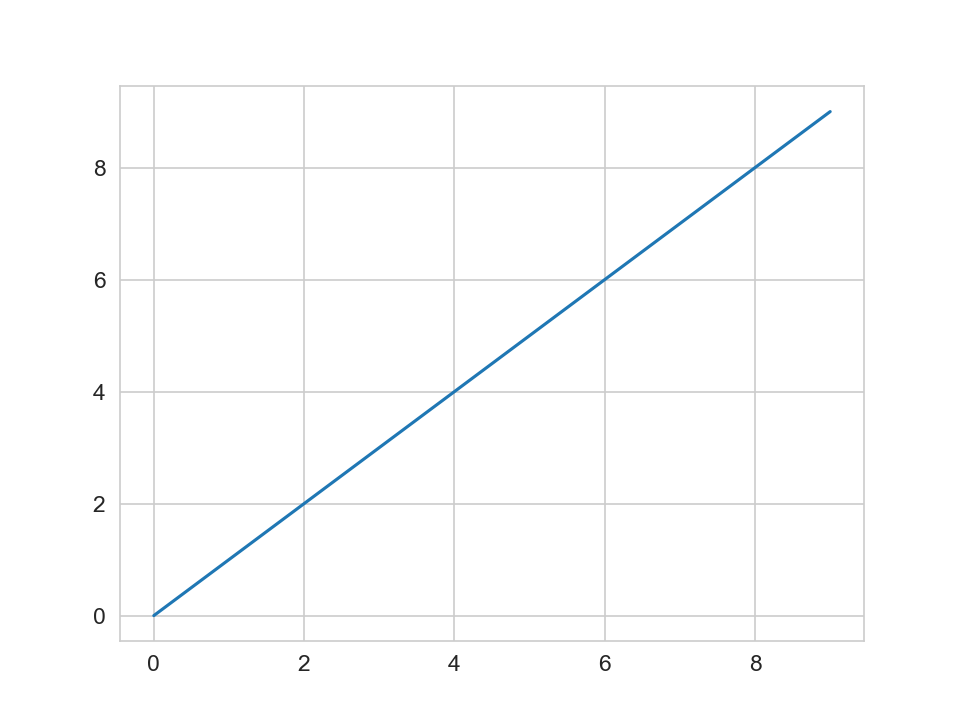

In [90]:
plt.plot(data)
plt.show()

## 基本概念

![Parts of a Figure](https://i.loli.net/2020/04/02/xm5lBi2MnqHaPVX.png)

### Figure：The whole figure. 

- The figure keeps track of all the child **Axes**, (可以有几个，但至少应有一个)
- a smattering of 'special' artists (**titles, figure legends, etc**), 
- and the **canvas**. 

创建*figure*的方法：

<IPython.core.display.Javascript object>


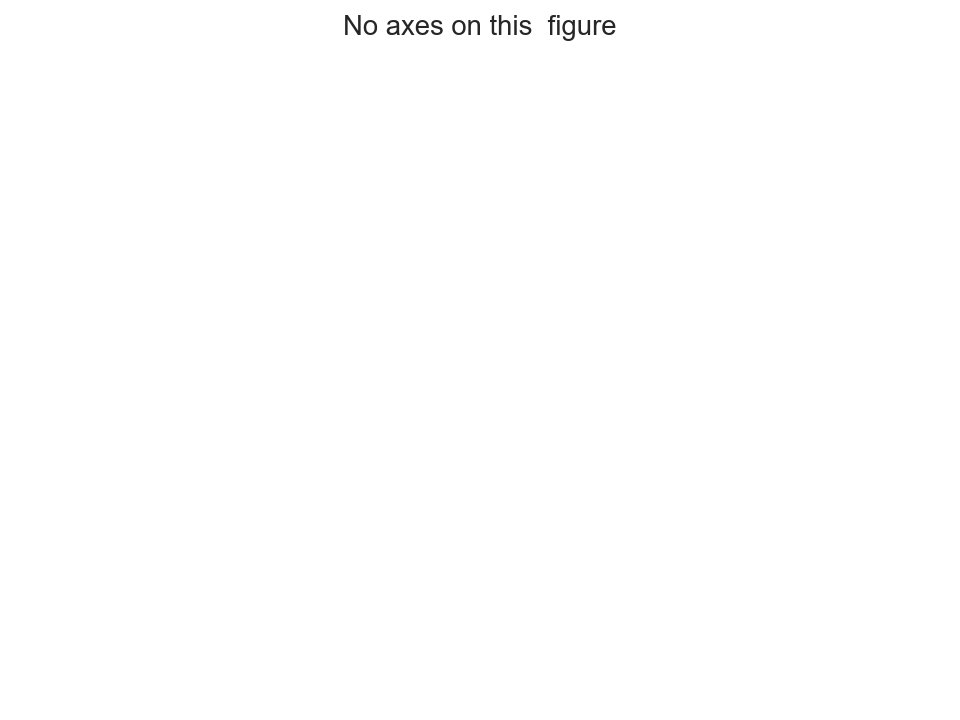

Text(0.5, 0.98, 'No axes on this  figure')

In [91]:
fig = plt.figure()  # an empty figure with no axes
fig.suptitle("No axes on this  figure")  # Add a title so we known which it is
plt.show() #  If you use non-GUI backend, it cannot show the figure.

<IPython.core.display.Javascript object>


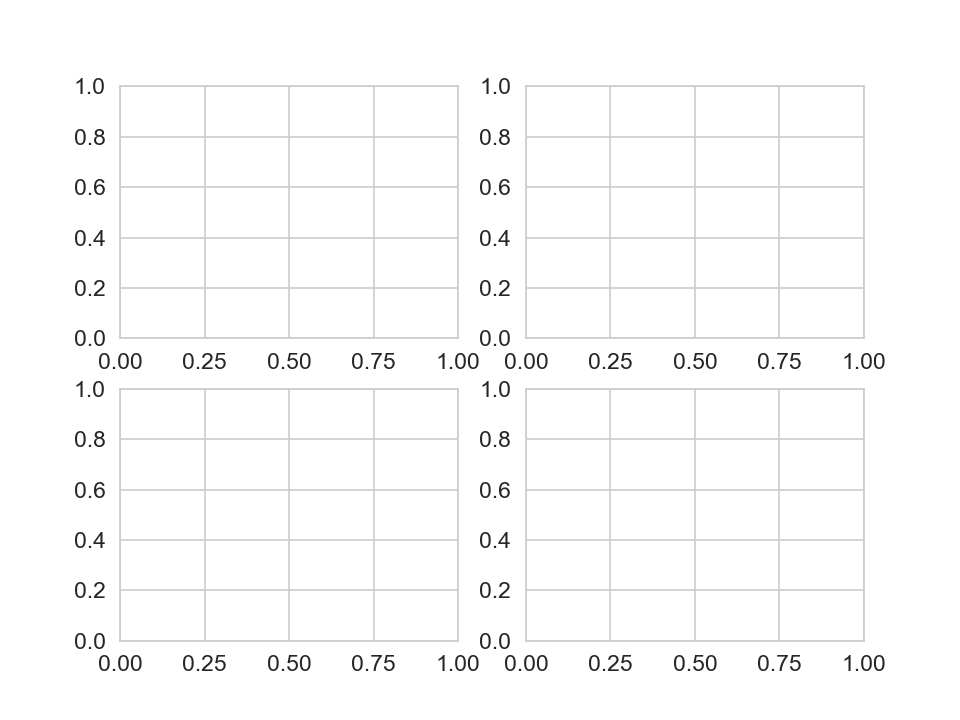

In [92]:
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

### Axes

-  it is the region of the image with the data space. 
- A given figure can contain many Axes, but a given Axes object can only be in one Figure
- The Axes contains two (or three in the case of 3D) Axis objects

### Artist

- Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects).
- This includes Text objects, Line2D objects, collection objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. 

## Figures 和Subplots
+ matplotlib的图像都位于`Figure`对象中，可以用`plt.figure`创建一个新的Figure.
+ `plt.figure`有一些选项，特别是`figsize`用于确定图片的大小和纵横比。
+ Figure还支持编号构建，譬如通过`plt.figure(2)`编号，后续可以通过`plt.gcf()`获取当前Figure的引用。


<IPython.core.display.Javascript object>


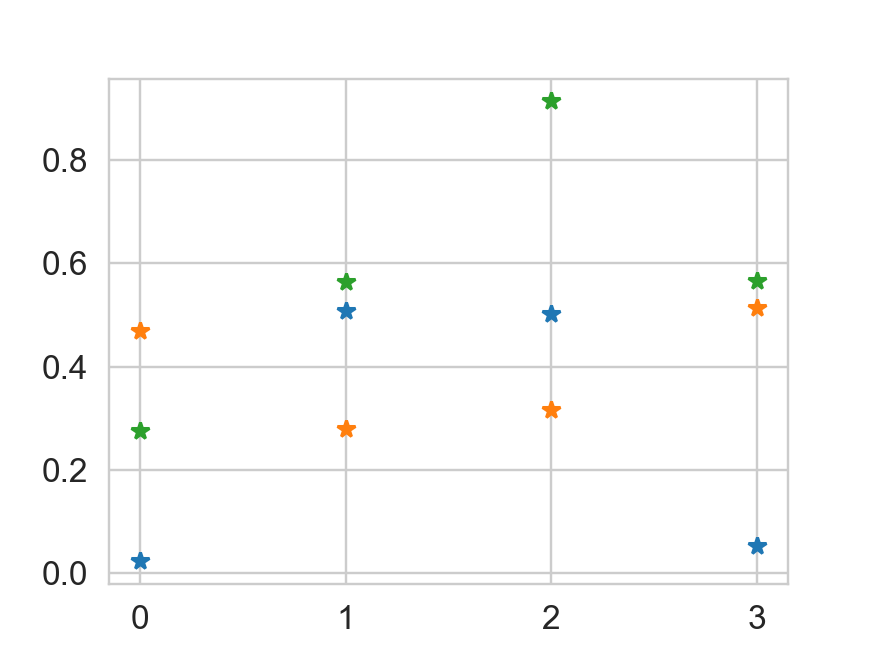

In [146]:
fig = plt.figure(figsize=(4,3))

In [147]:
ax1 = fig.add_subplot(1,1,1)

In [148]:
plt.plot(np.random.random((4,3)), '*')

+ 不能通过空Figure绘图，必须用`add_subplot`创建一个或多个subplot才行：

<IPython.core.display.Javascript object>


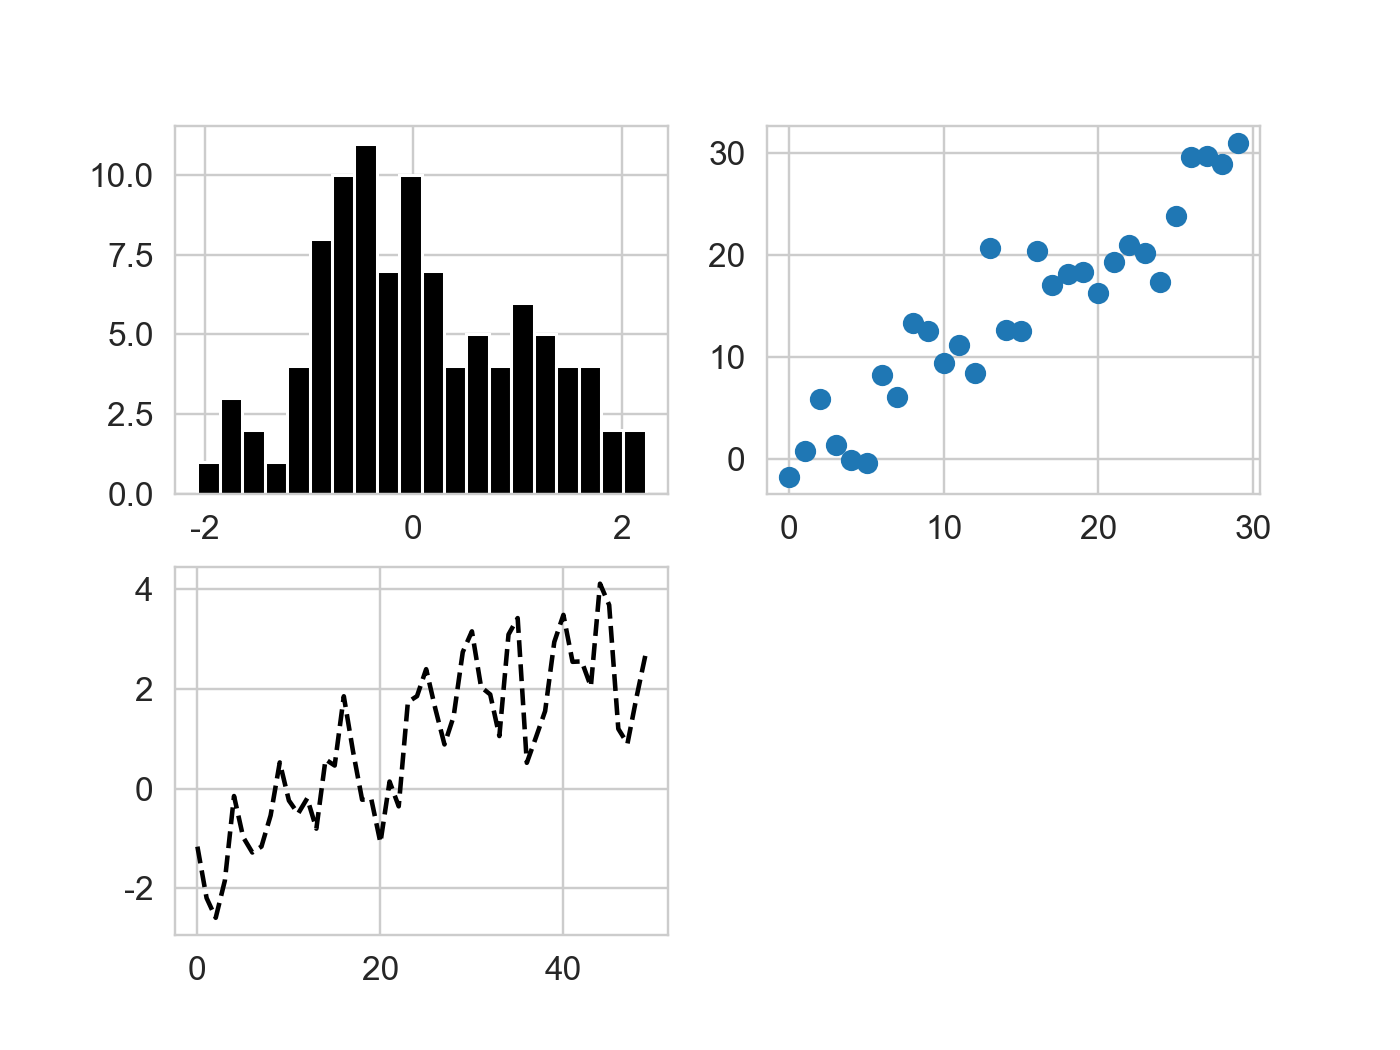

In [149]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)  # 图像2x2，即4个子图，这是第1个

In [150]:
ax2 = fig.add_subplot(2, 2, 2) # 第二个
ax3 = fig.add_subplot(2, 2, 3) # 第三个

如果此时发出一条绘图命令，则matplotlib会在最后一个用过的subplot上绘图。如果没有，则会创建一个。

In [151]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [152]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k')
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [103]:
plt.show()

+ 由于根据特定的布局创建Figure和subplot非常常见，所以有了更为简便的方法。`plt.subplots`，其创建一个Figure，并返回一个含有已创建subplot对象的NumPy数组。

<IPython.core.display.Javascript object>


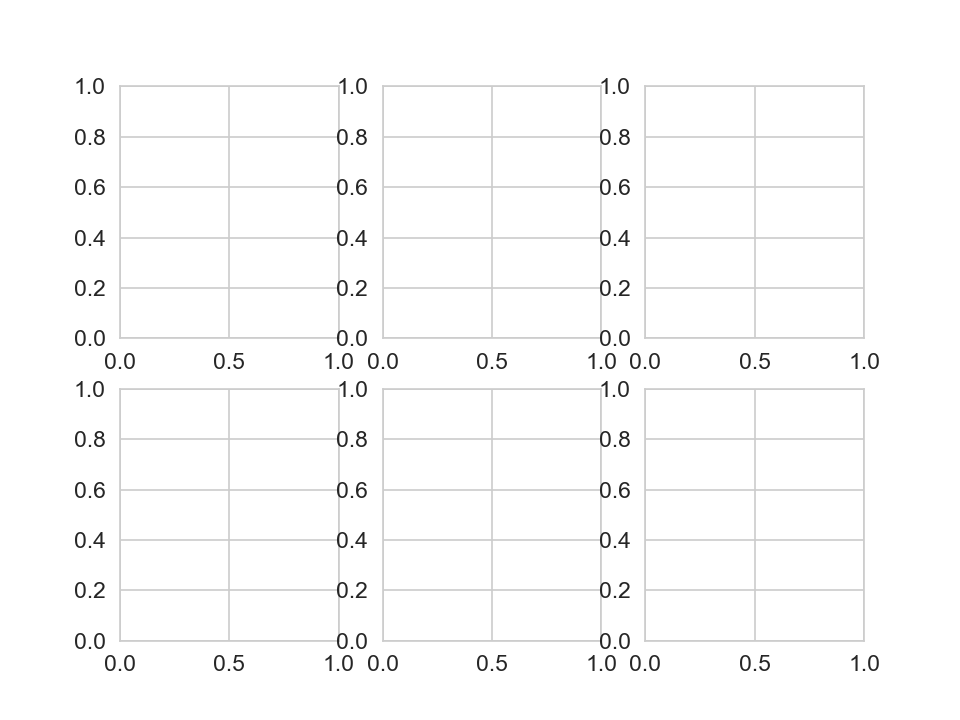

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002ABEC675D88>,
      dtype=object)

In [104]:
fig, axes = plt.subplots(nrows=2, ncols=3)
axes

`pyplot.subplots`选项

| 参数 | 说明 |
|-----|-----|
|`nrows`|行数|
|`ncols`|列数|
|`sharex`|共用X轴刻度|
|`sharey`|共用Y轴刻度|
|`subplot_kw`|用于创建subpolot的各关键字字典|
|`**fig_kw`|创建figure时的其他关键字，如`plt.subplots(2,2, figsize=(8,6))`|

### 调整subplots周围间距
+ 默认情况下，subplot周围会会留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关。
+ 利用Figure的`subplots_adjust`方法可以修改，同时也是一个顶级函数。

`subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=None, hspace=None)`

<IPython.core.display.Javascript object>


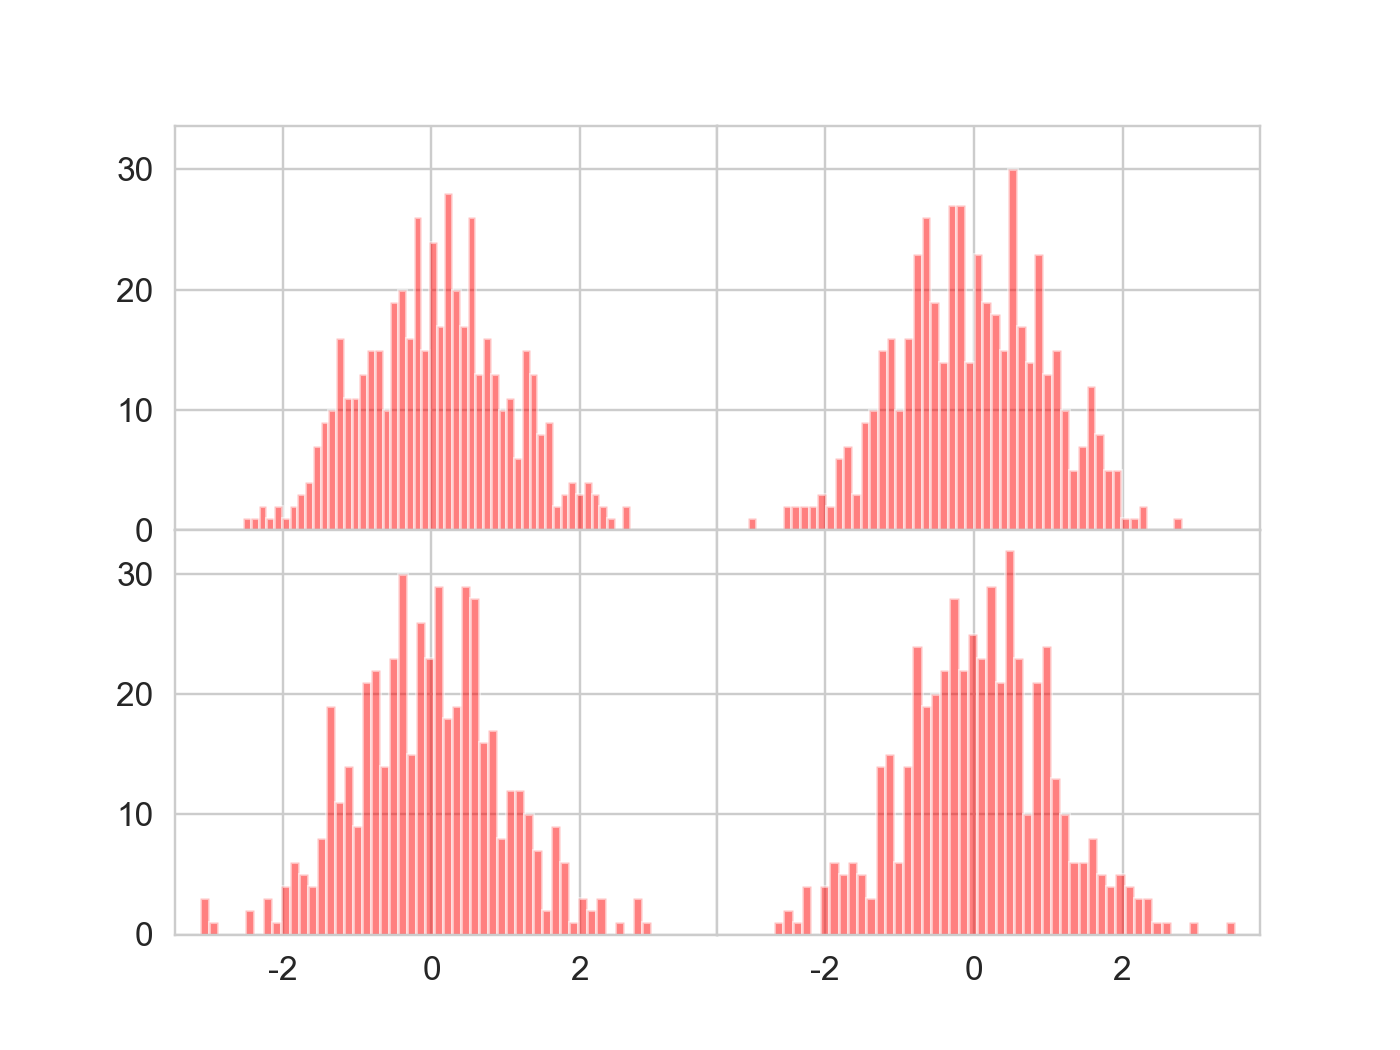

In [153]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

In [154]:
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='r', alpha=0.5)   # alpha 透明度参数


(array([ 1.,  1.,  2.,  1.,  2.,  1.,  2.,  3.,  4.,  7.,  9., 10., 16.,
        11., 11., 13., 15., 15., 10., 19., 20., 16., 26., 15., 24., 17.,
        28., 20., 17., 26., 13., 16., 13., 10., 11.,  6., 15., 13.,  8.,
         9.,  2.,  3.,  4.,  3.,  4.,  3.,  2.,  1.,  0.,  2.]),
 array([-2.53110414, -2.4270277 , -2.32295126, -2.21887482, -2.11479838,
        -2.01072194, -1.9066455 , -1.80256906, -1.69849262, -1.59441618,
        -1.49033974, -1.3862633 , -1.28218686, -1.17811042, -1.07403398,
        -0.96995754, -0.8658811 , -0.76180466, -0.65772822, -0.55365178,
        -0.44957534, -0.3454989 , -0.24142246, -0.13734603, -0.03326959,
         0.07080685,  0.17488329,  0.27895973,  0.38303617,  0.48711261,
         0.59118905,  0.69526549,  0.79934193,  0.90341837,  1.00749481,
         1.11157125,  1.21564769,  1.31972413,  1.42380057,  1.52787701,
         1.63195345,  1.73602989,  1.84010633,  1.94418277,  2.04825921,
         2.15233565,  2.25641209,  2.36048852,  2.46456496,

(array([ 1.,  0.,  0.,  0.,  2.,  2.,  2.,  2.,  3.,  2.,  6.,  7.,  3.,
         9., 10., 15., 16., 10., 16., 23., 26., 19., 14., 27., 27., 14.,
        23., 19., 18., 15., 30., 17., 14., 23., 13., 15., 10.,  5.,  7.,
        12.,  8.,  5.,  5.,  1.,  1.,  2.,  0.,  0.,  0.,  1.]),
 array([-3.0418384 , -2.92501314, -2.80818788, -2.69136263, -2.57453737,
        -2.45771211, -2.34088686, -2.2240616 , -2.10723634, -1.99041108,
        -1.87358583, -1.75676057, -1.63993531, -1.52311006, -1.4062848 ,
        -1.28945954, -1.17263429, -1.05580903, -0.93898377, -0.82215851,
        -0.70533326, -0.588508  , -0.47168274, -0.35485749, -0.23803223,
        -0.12120697, -0.00438171,  0.11244354,  0.2292688 ,  0.34609406,
         0.46291931,  0.57974457,  0.69656983,  0.81339509,  0.93022034,
         1.0470456 ,  1.16387086,  1.28069611,  1.39752137,  1.51434663,
         1.63117188,  1.74799714,  1.8648224 ,  1.98164766,  2.09847291,
         2.21529817,  2.33212343,  2.44894868,  2.56577394,

(array([ 3.,  1.,  0.,  0.,  0.,  2.,  0.,  3.,  1.,  4.,  6.,  5.,  4.,
         8., 19., 11., 14.,  9., 21., 22., 14., 23., 30., 15., 26., 23.,
        29., 18., 19., 29., 28., 16., 17.,  8., 12., 12., 10.,  7.,  2.,
         9.,  6.,  1.,  3.,  2.,  3.,  0.,  1.,  0.,  3.,  1.]),
 array([-3.11716136, -2.99587969, -2.87459802, -2.75331636, -2.63203469,
        -2.51075302, -2.38947135, -2.26818969, -2.14690802, -2.02562635,
        -1.90434468, -1.78306302, -1.66178135, -1.54049968, -1.41921801,
        -1.29793635, -1.17665468, -1.05537301, -0.93409134, -0.81280967,
        -0.69152801, -0.57024634, -0.44896467, -0.327683  , -0.20640134,
        -0.08511967,  0.036162  ,  0.15744367,  0.27872533,  0.400007  ,
         0.52128867,  0.64257034,  0.763852  ,  0.88513367,  1.00641534,
         1.12769701,  1.24897868,  1.37026034,  1.49154201,  1.61282368,
         1.73410535,  1.85538701,  1.97666868,  2.09795035,  2.21923202,
         2.34051368,  2.46179535,  2.58307702,  2.70435869,

(array([ 1.,  2.,  1.,  4.,  0.,  4.,  6.,  5.,  6.,  5.,  3., 14., 15.,
         6., 14., 24., 19., 20., 22., 28., 22., 25., 23., 29., 21., 32.,
        23., 10., 21., 24., 13., 10.,  6.,  6.,  8.,  5.,  4.,  5.,  4.,
         3.,  3.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-2.68715592, -2.56311739, -2.43907886, -2.31504034, -2.19100181,
        -2.06696328, -1.94292475, -1.81888622, -1.6948477 , -1.57080917,
        -1.44677064, -1.32273211, -1.19869358, -1.07465506, -0.95061653,
        -0.826578  , -0.70253947, -0.57850094, -0.45446242, -0.33042389,
        -0.20638536, -0.08234683,  0.0416917 ,  0.16573022,  0.28976875,
         0.41380728,  0.53784581,  0.66188434,  0.78592286,  0.90996139,
         1.03399992,  1.15803845,  1.28207698,  1.4061155 ,  1.53015403,
         1.65419256,  1.77823109,  1.90226962,  2.02630814,  2.15034667,
         2.2743852 ,  2.39842373,  2.52246226,  2.64650079,  2.77053931,
         2.89457784,  3.01861637,  3.1426549 ,  3.26669343,

In [155]:
plt.subplots_adjust(wspace=0, hspace=0)

## 颜色、标记和线型（Colors, Markers, and Line Styles）

`ax.plot(x, y, 'g--')`

`ax.plot(x, y, linestyle='--', color='g')`

+ 常用颜色：r:Red; y:yelow, b:blue, g:green, c:cyan, k:black, w:white。也可以使用RGB形式使用，譬如：'#CECECE'
+ 常用线性：':':dotted、‘--’:dashed、‘-.’：dashdotted，'-':solid
+ 线型图还可以加上一些标记(marker),以强调实际的数据点。常用marker: '.'  ',' 'o' 'v'等，具体[参考列表](https://matplotlib.org/stable/api/markers_api.html)

<IPython.core.display.Javascript object>


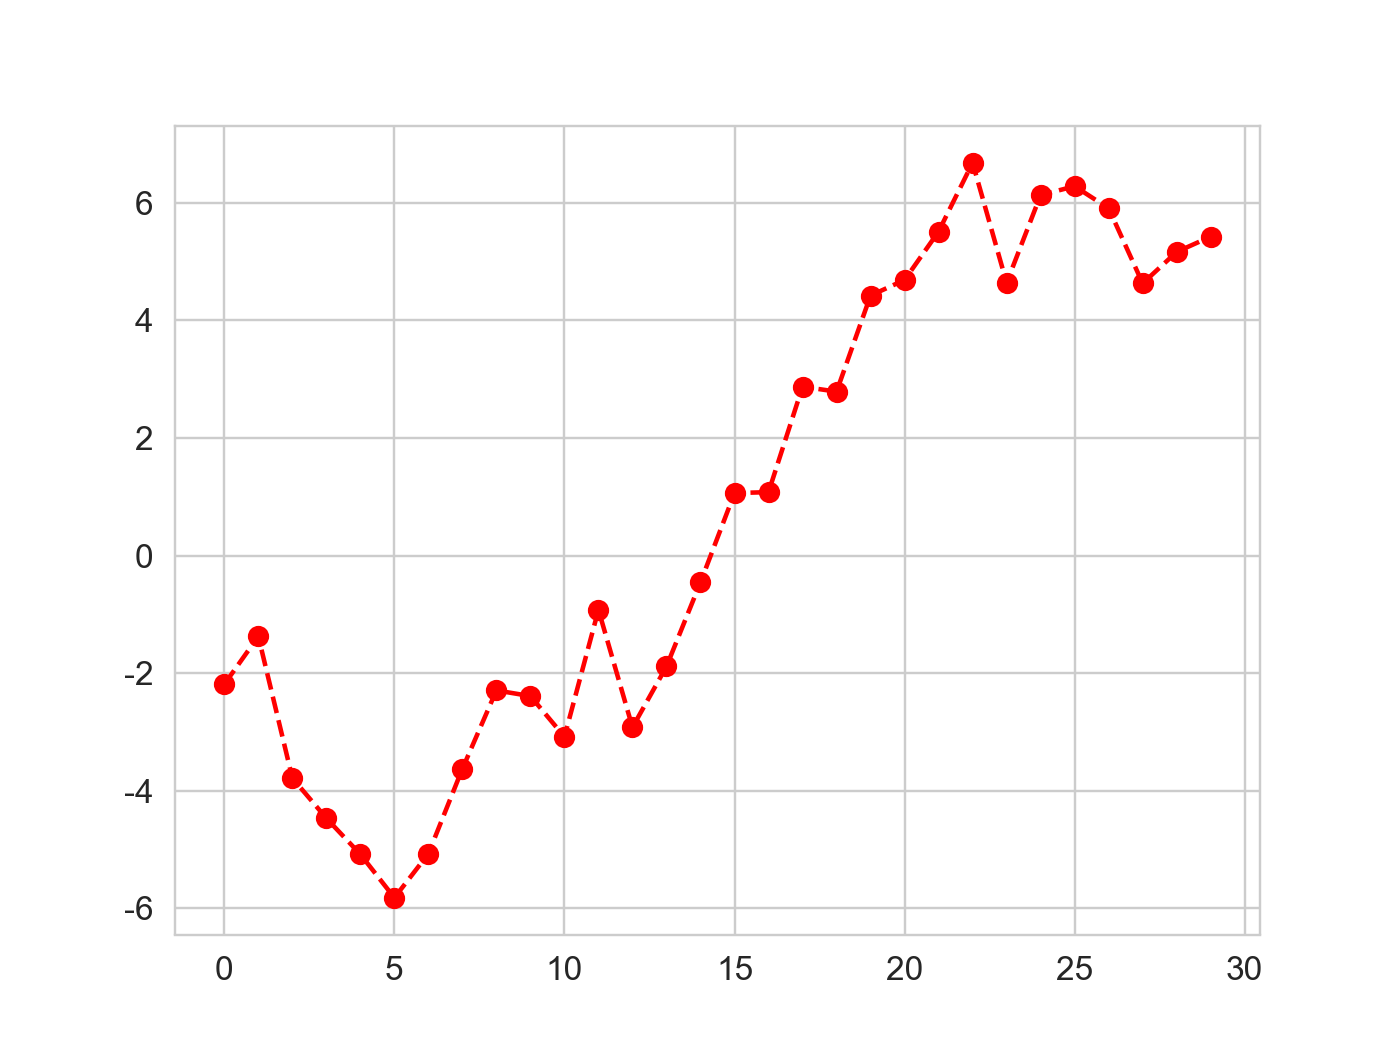

<IPython.core.display.Javascript object>


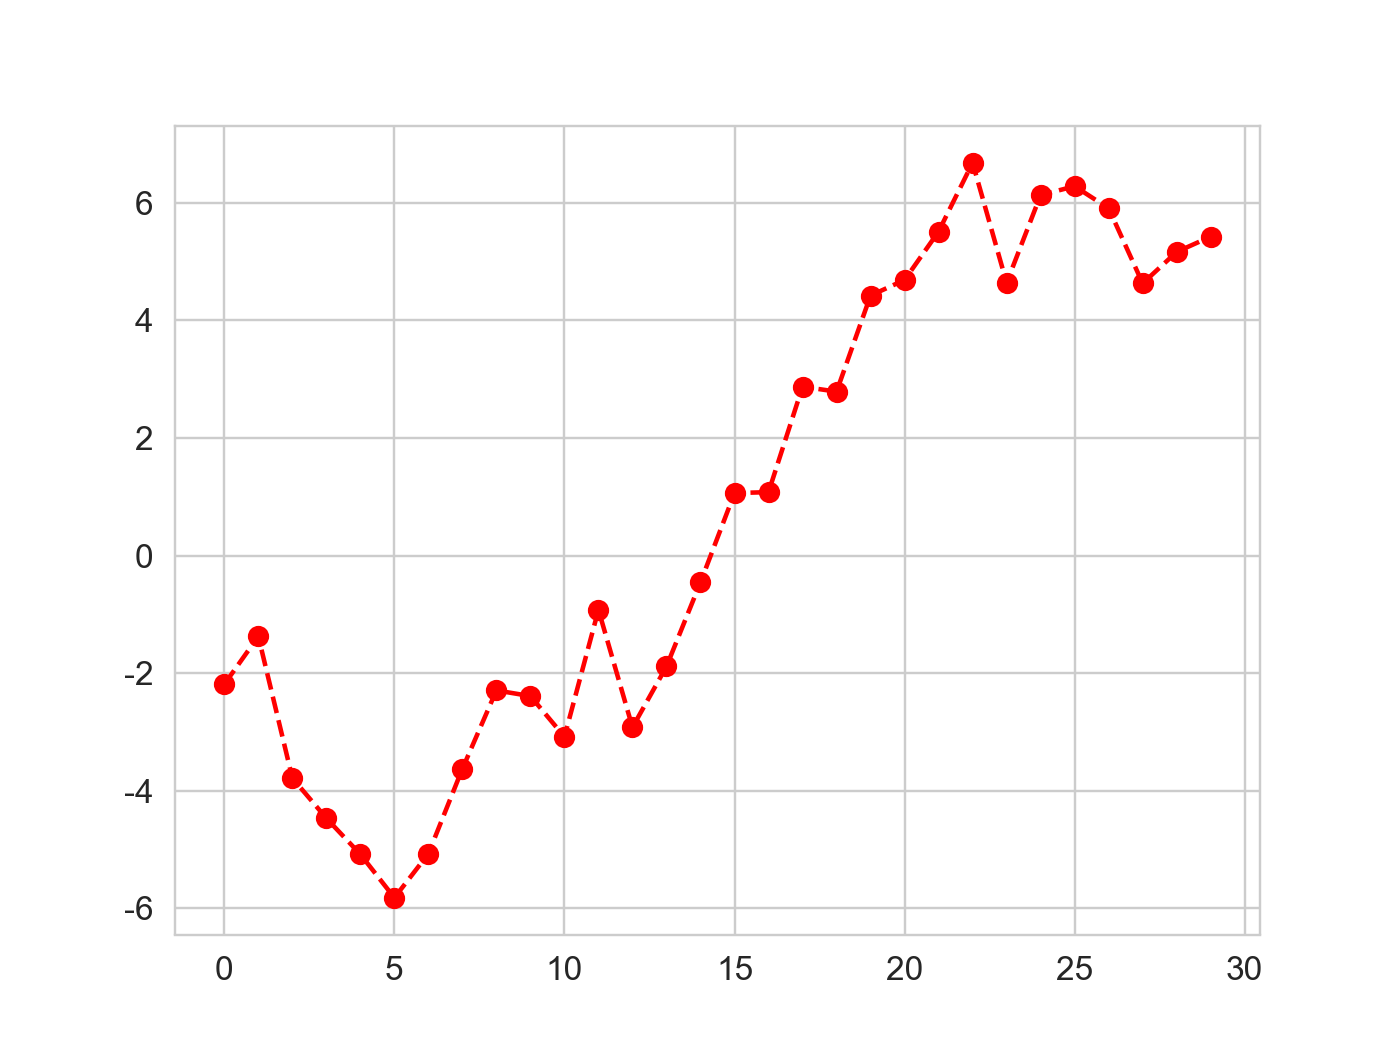

In [156]:
plt.figure()
plt.plot(np.random.randn(30).cumsum(), 'ro--')

上述命令等价于：

plot(randn(30).cumsum(), color='r', linestyle='dashed', marker='o')

In [107]:
plt.close('all')  # close all the figure window

+ 连线时采用插值法（点与点之间插值）

<IPython.core.display.Javascript object>


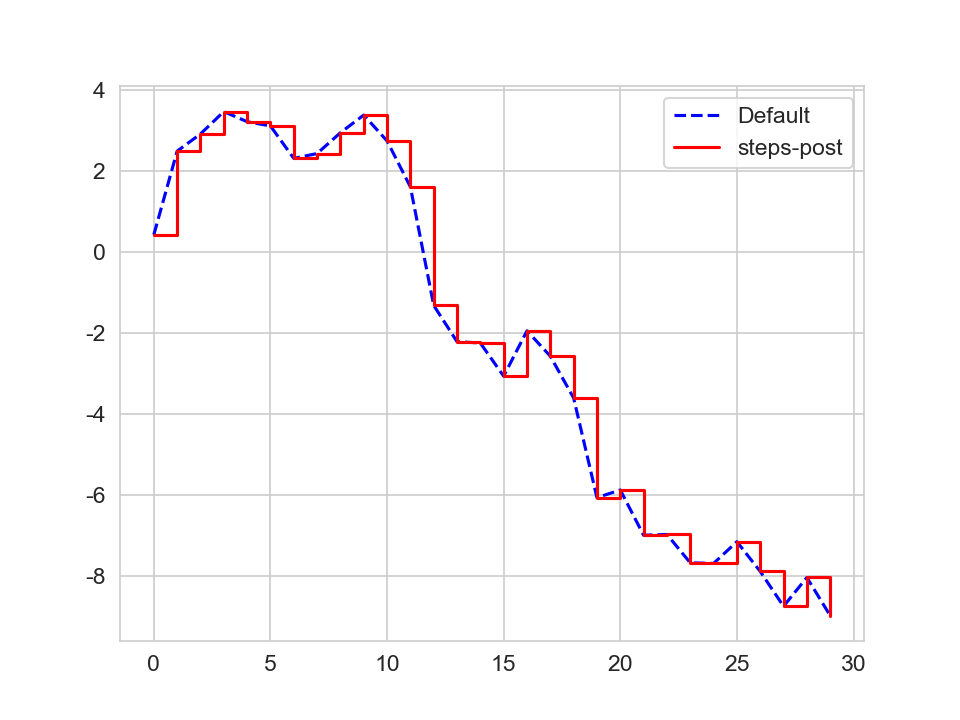

In [108]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'b--', label='Default')
plt.plot(data, 'r-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')
plt.show()

## 刻度、标签和图例（Ticks, Labels, and Legends）
+ `xlim`,`xticks`,`xticklabels`之类的方法可以控制图表的范围、刻度位置、刻度标签
+ 如果调用时不带参数，则返回当前的参数值，譬如`plt.xlim()`返回当前x轴的绘图范围
+ 调用时带参数，则设置参数值。譬如，`plt.xlim([0, 10])`将X轴的范围设置为0到10。

### 设置标题、轴标签、刻度以及刻度标签

<IPython.core.display.Javascript object>


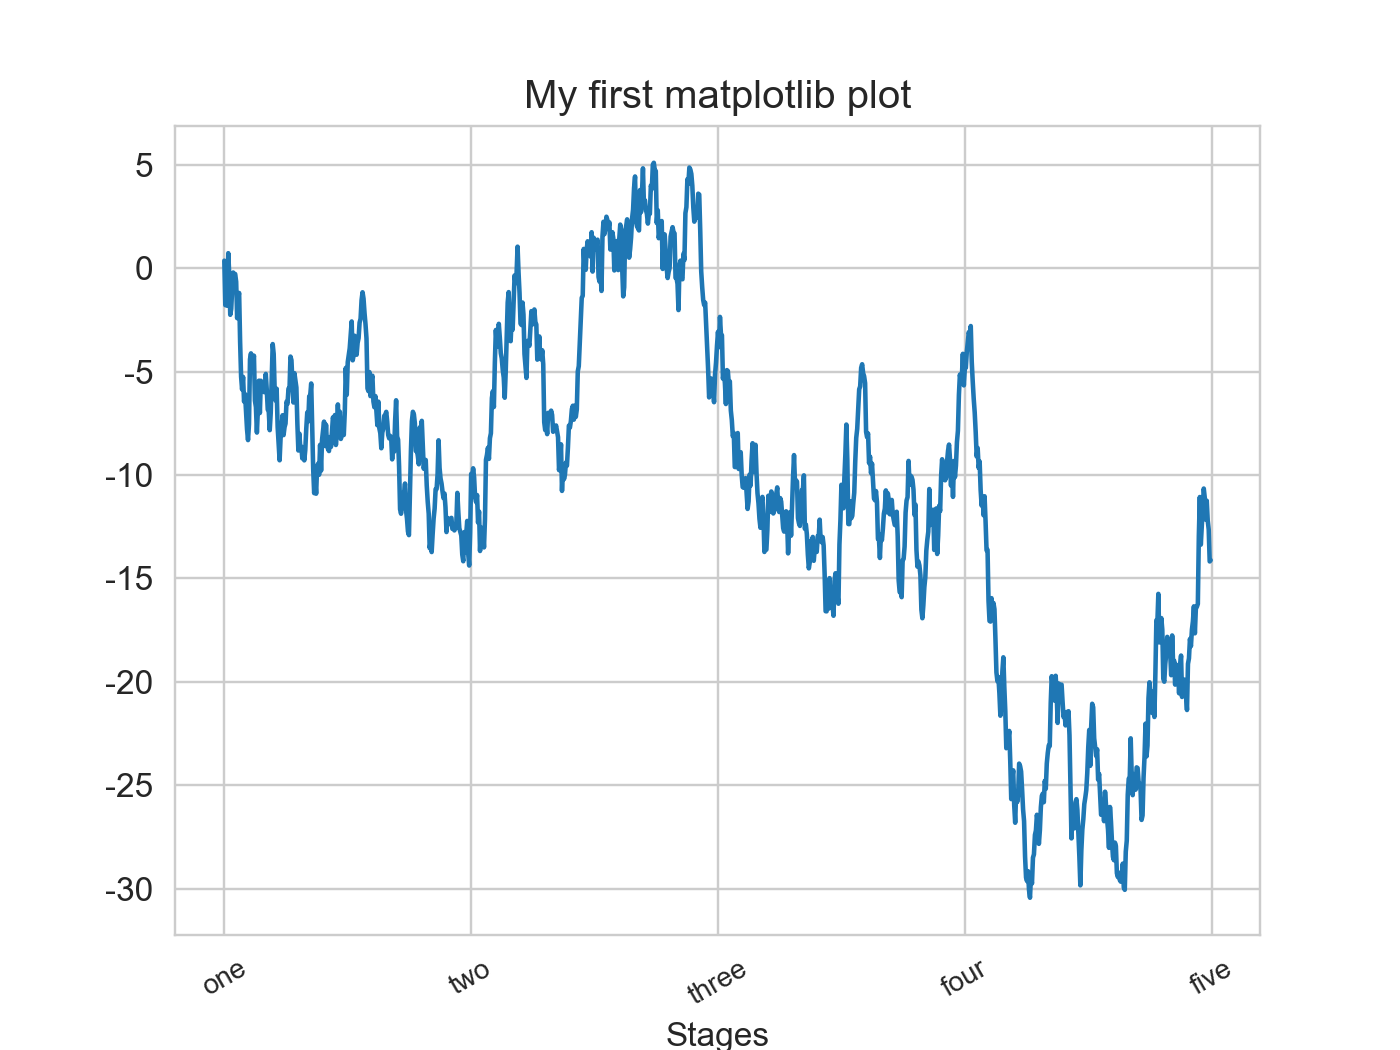

In [157]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [158]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [159]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 1.0, 'My first matplotlib plot')

Text(0.5, 27.87570061271569, 'Stages')

也可以通过下述方式进行设置：

`props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)`

### 添加图例
+ 可以在添加subplot时传入label参数
+ 也可以调用`ax.legend()`或`plt.legend()`创建图例。

<IPython.core.display.Javascript object>


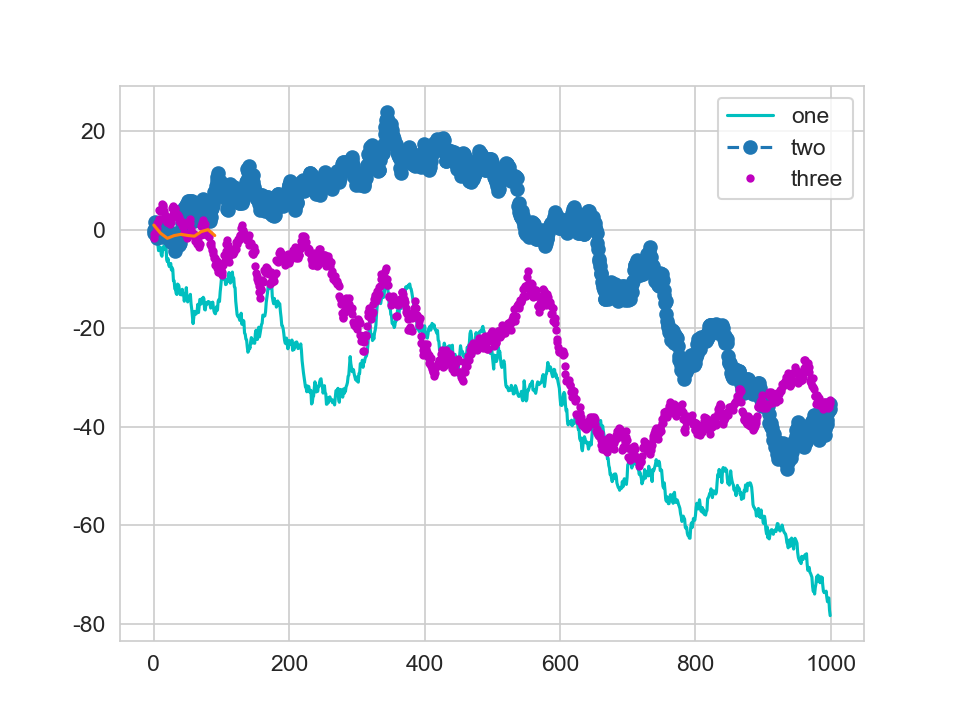

In [113]:
fig = plt.figure(); 
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'c', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'o--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'm.', label='three')

In [114]:
ax.legend(loc='best') # 自动选址图例最佳位置
plt.show()

## 注解以及subplot上绘图
+ 如需绘制一些自定义的注解（譬如，文本、箭头或其他图形），可以通过`text`、`arrow`和`annotate`等函数进行添加。

```
ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)
```

<IPython.core.display.Javascript object>


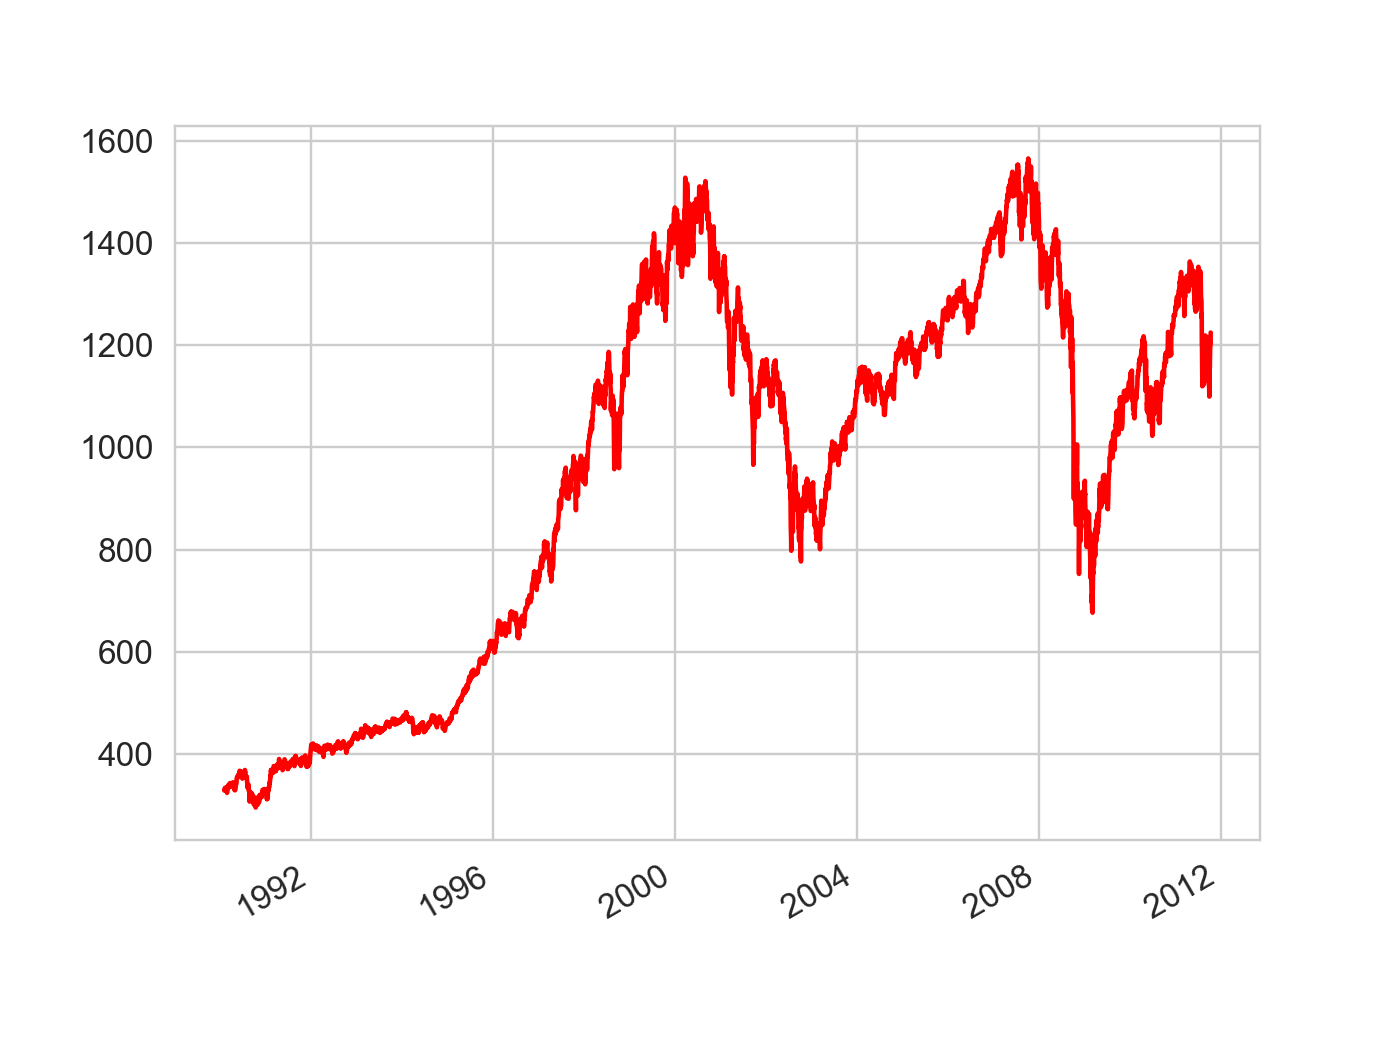

SPX
1990-02-01  328.79
1990-02-02  330.92
1990-02-05  331.85
1990-02-06  329.66
1990-02-07  333.75

In [160]:
import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
data.head()

In [161]:
spx = data['SPX']

spx.plot(ax=ax, style='r-')

<IPython.core.display.Javascript object>


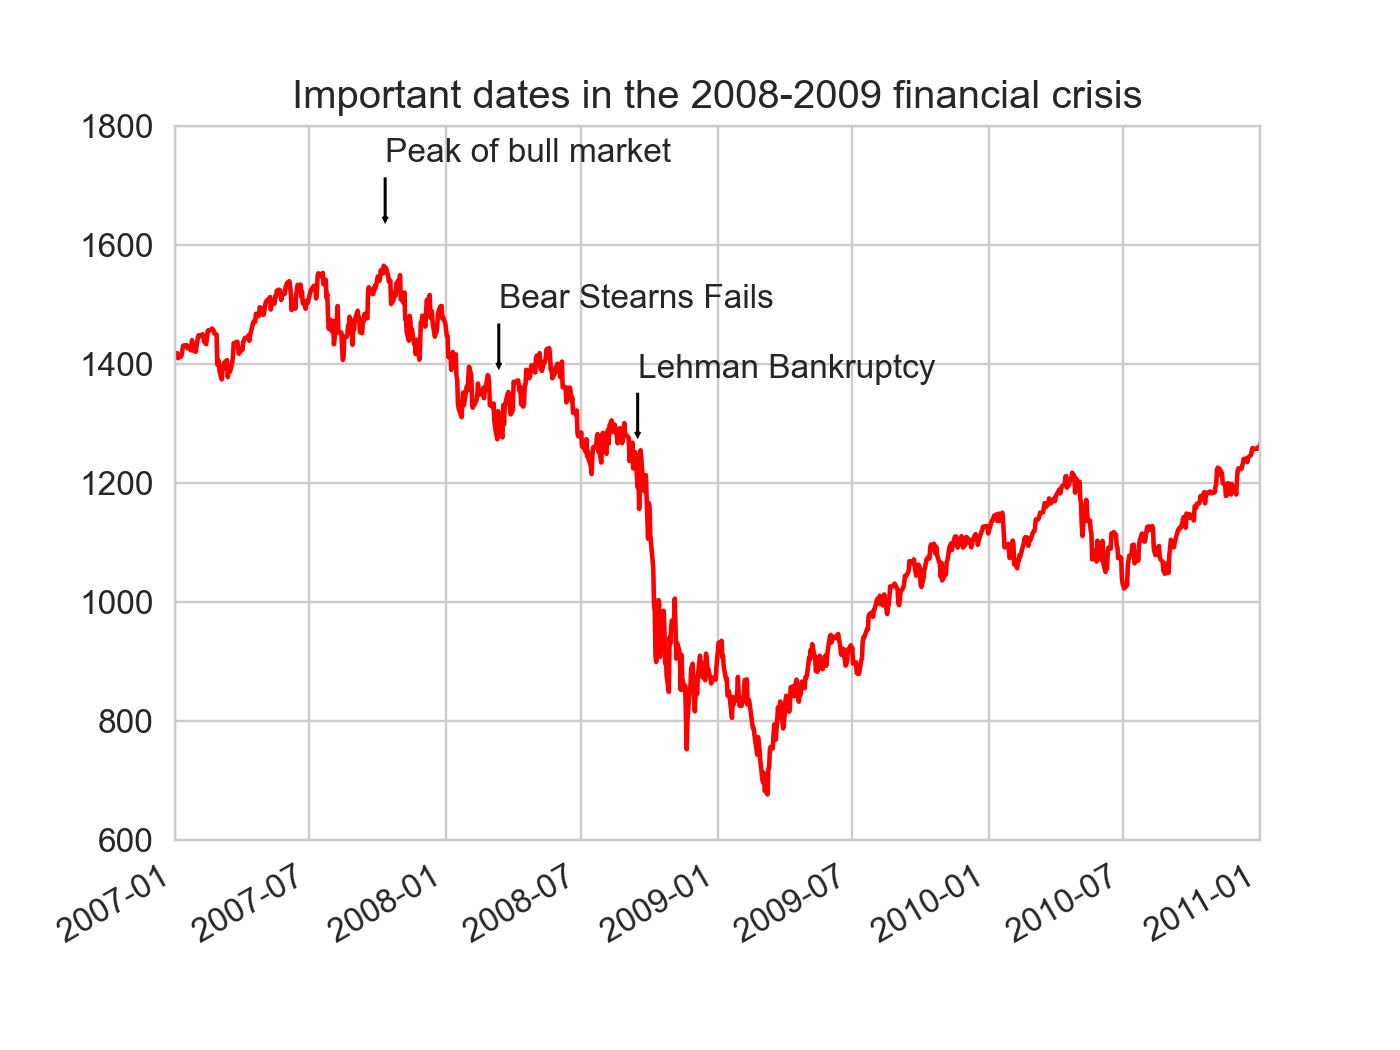

Text(2007-10-11 00:00:00, 1779.41, 'Peak of bull market')

Text(2008-03-12 00:00:00, 1533.77, 'Bear Stearns Fails')

Text(2008-09-15 00:00:00, 1417.7, 'Lehman Bankruptcy')

(732677.0, 734138.0)

(600.0, 1800.0)

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [162]:
import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='r-')


crisis_data = [
    (datetime.datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime.datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime.datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
# asof()函数得到时间点处的有效值，即Series中该时间点处的值
for (date, label) in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')
plt.show()

+ matplotlib有一些表示常见图形的对象，这些对象成为**块(patch)** 。要在图表中加入一个图形，需要创建一个块对象`shp`，然后通过`ax.add_patch(shp)`将其添加到subplot中。

<IPython.core.display.Javascript object>


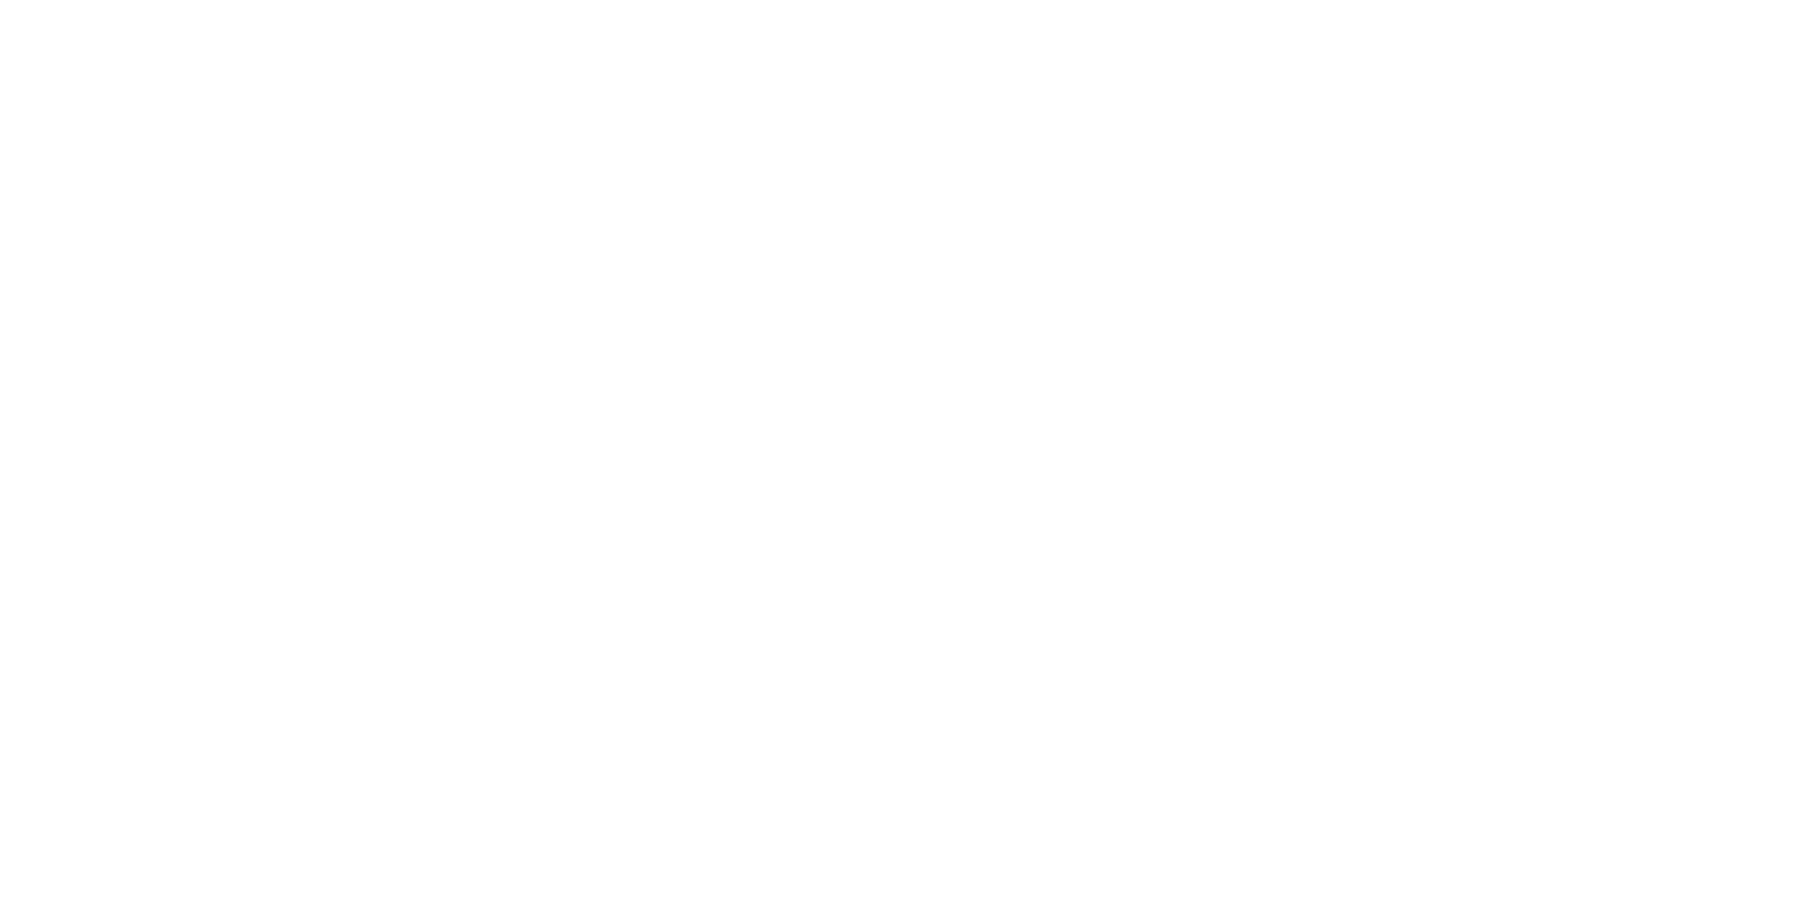

In [32]:
fig = plt.figure(figsize=(12, 6)); 
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.show()

## 将图表保存到文件
利用`plt.savefig`保存到文件。

```
plt.savefig('figpath.svg')
```

```
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

## matplotlib配置

```
plt.rc('figure', figsize=(10, 10))
```

```
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)
```

<IPython.core.display.Javascript object>


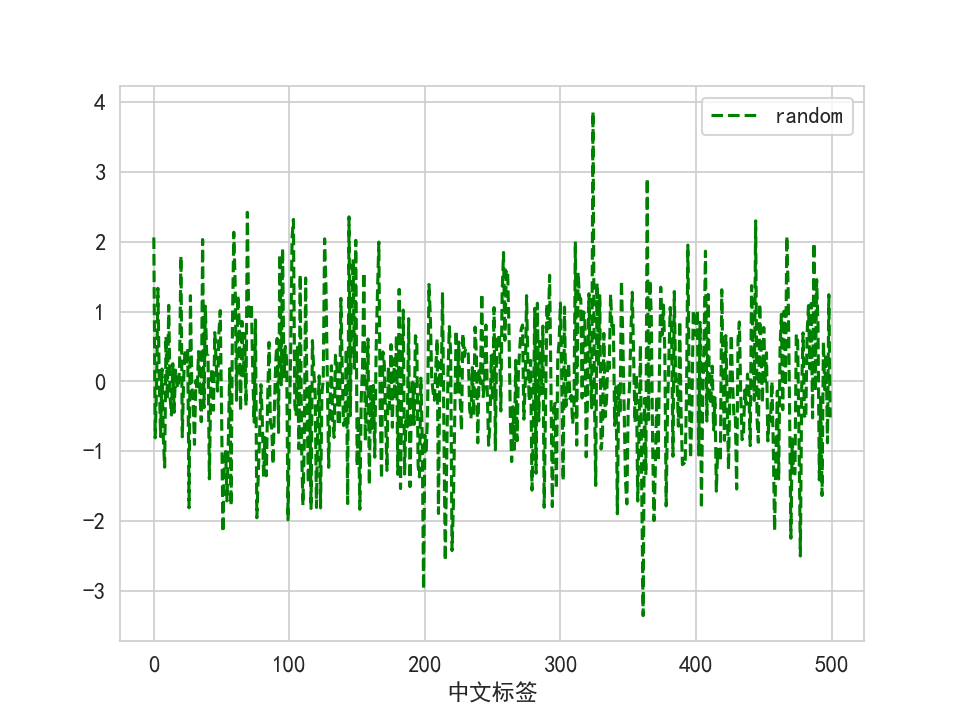

Text(0.5, 0, '中文标签')

In [117]:
%matplotlib notebook

font_options = {'family':'SimHei','size':11}

plt.rc('font', **font_options)
plt.rcParams['axes.unicode_minus'] = False # 正常显示负号

plt.plot(np.random.randn(500), 'g--',label='random')
plt.legend(loc='best')
plt.xlabel('中文标签')
plt.show()

# Plotting with pandas

## 线型图
Series和DataFrame都有一个专门用于生产各类图表的`plot`方法，默认情况下其生成的时线型图。

In [116]:
plt.close('all')

<IPython.core.display.Javascript object>


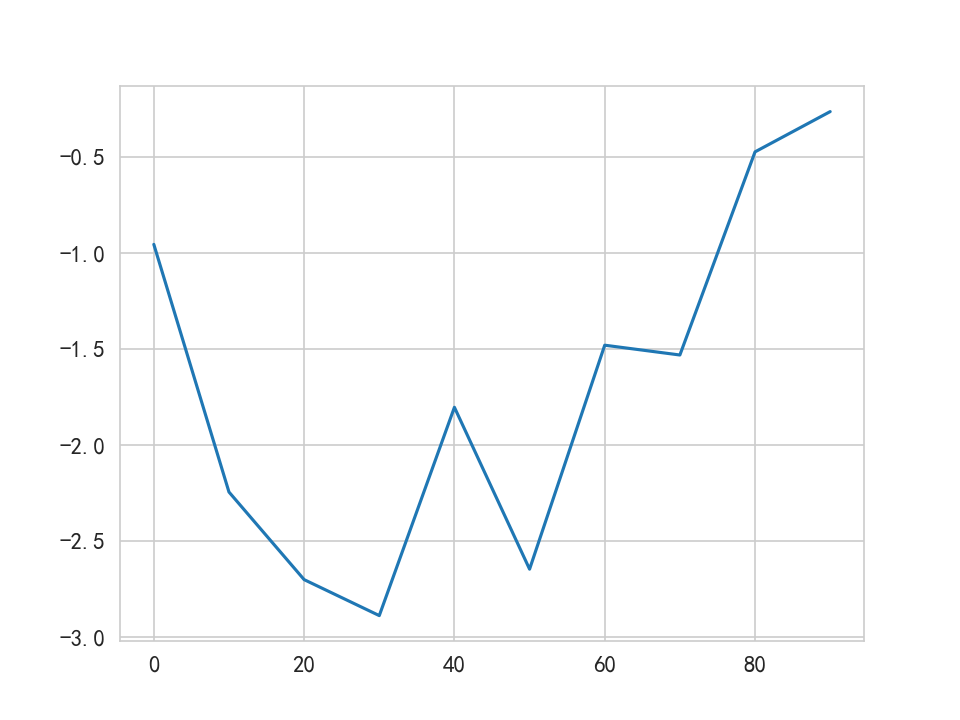

In [118]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

+ Series对象的索引会被传给matlibplot，并用以绘制X轴。可以用`use_index=False`禁用此功能。
+ x轴的刻度和界限可以通过xticks和xlim选项进行调节，y轴就用yticks和ylim进行调整。

Series.plot方法的参数：


| 参数 | 说明 |
|----|----|
|`label`|图例标签|
|`ax`|在其上进行绘制的matlibplot subplot对象。如果没有设置，则使用当前matlibplot subplot|
|`style`|要传递给matlibplot的风格字符串，例如 `ko-`|
|`alpha`|图表填充的不透明度|
|`kind`|可以是`line`,`bar`, `barh`,`kde`|
|`logy`|在y轴上使用对数标尺|
|`use_index`|经对象的索引用作刻度标签|
|`rot`|旋转刻度标签(0---360)|
|`xticks`|用作x轴刻度的值|
|`yticks`|用作y轴刻度的值|
|`xlim`|x轴的界限|
|`ylim`|y轴的界限|
|`grid`|显示轴网格线，默认打开|

<IPython.core.display.Javascript object>


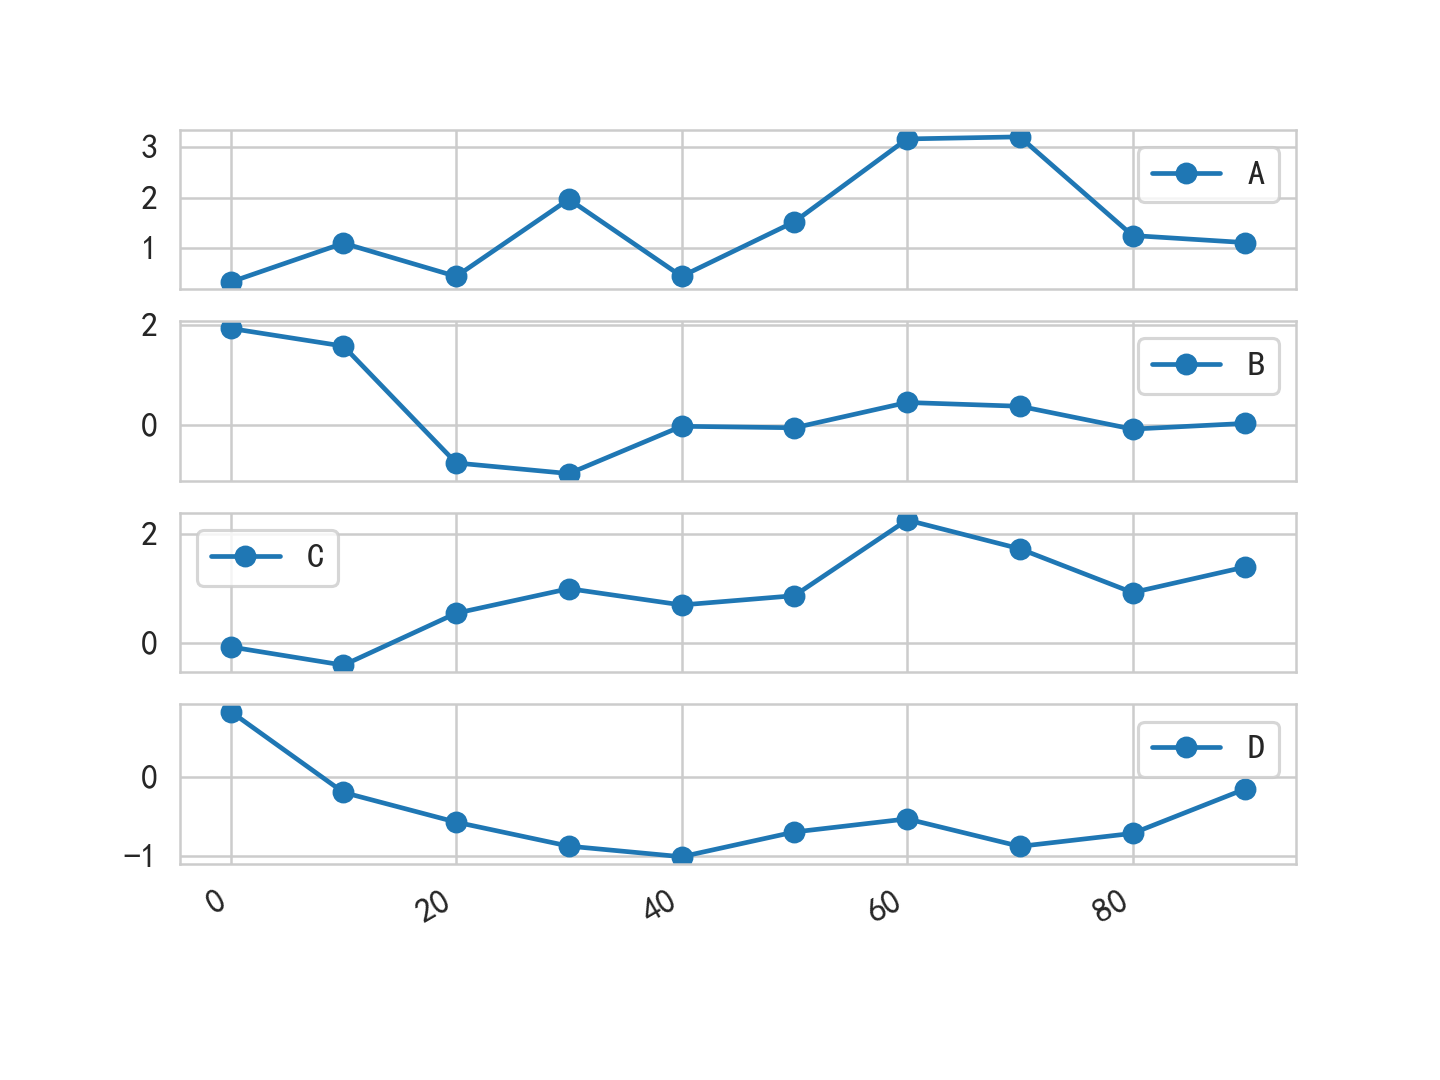

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002ABF00BE4C8>,
      dtype=object)

In [119]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot(subplots=True,style='o-')
plt.show()

DataFrame的plot的参数

|参数|说明|
|----|----|
|`subplots`|将各个DataFrame列绘制到单独的subplot中|
|`sharex`|是否共用一个X轴，包括刻度和界限|
|`sharey`|是否共用一个Y轴，包括刻度和界限|
|`figsize`|表示图像大小的元组|
|`title`|图像标题|
|`legend`|添加一个subplot图例，默认为True|
|`sort_columns`|以字母表顺序绘制各列，默认使用当前列顺序|

## 柱状图（Bar Plots）

<IPython.core.display.Javascript object>


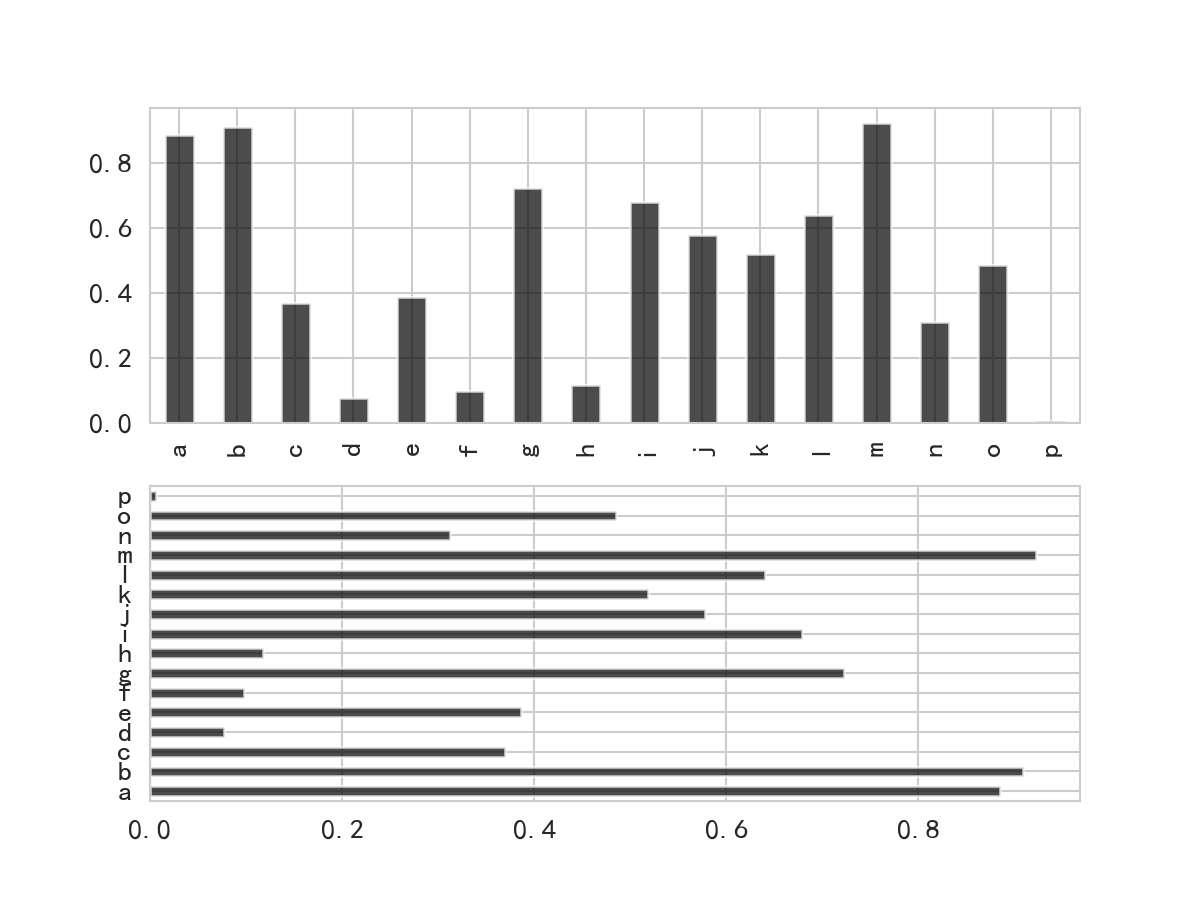

In [120]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)
# data.plot(kind='bar',ax=axes[0], color='k', alpha=0.7)
plt.show()

对于DataFrame，柱状图会将每一行的值分为一组

In [38]:
np.random.seed(12348)

Genus         A         B         C         D
one    0.401077  0.603671  0.705774  0.975917
two    0.860352  0.742702  0.326943  0.387852
three  0.345461  0.122151  0.950891  0.127744
four   0.831185  0.371035  0.619621  0.274400
five   0.556059  0.789838  0.270031  0.386216
six    0.262549  0.232387  0.621224  0.482047

<IPython.core.display.Javascript object>


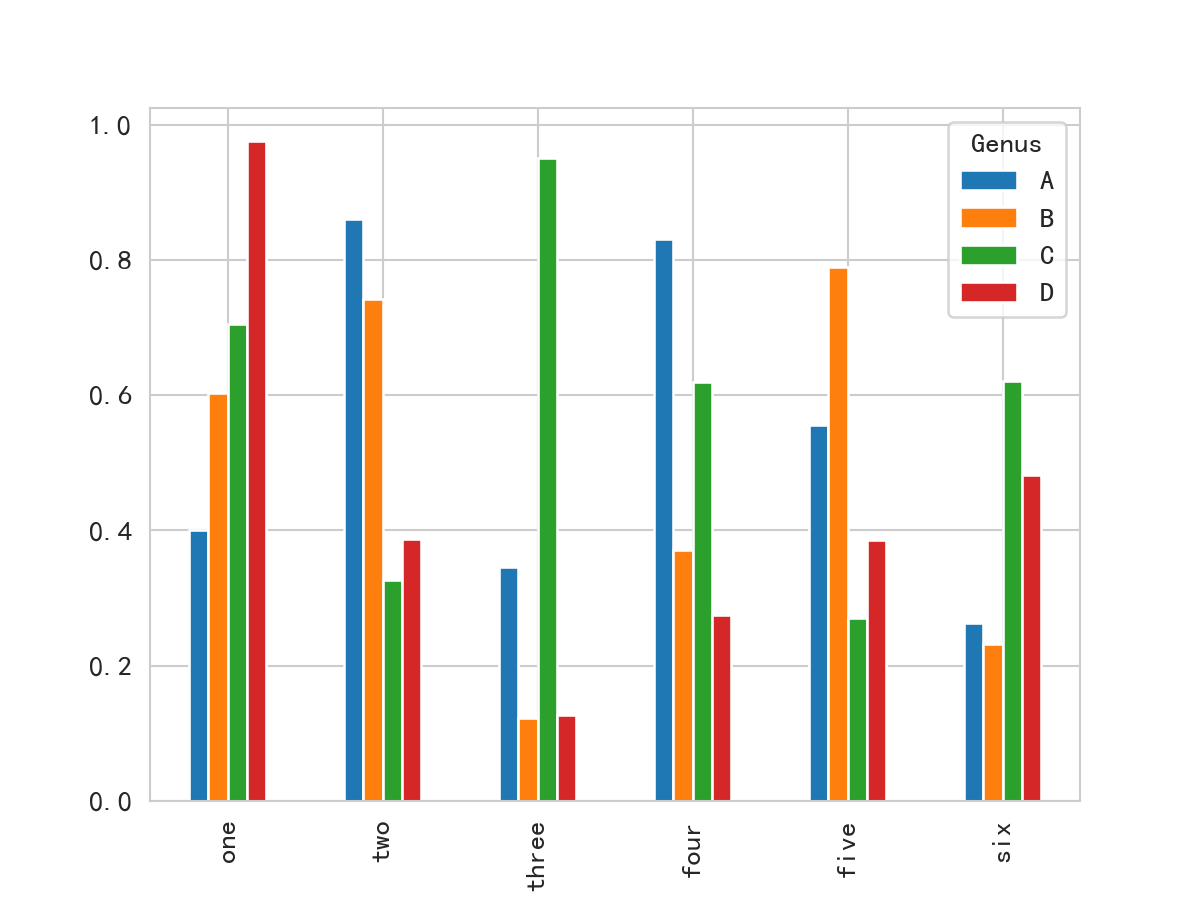

In [121]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar') # 新版中，可以用df.plot.bar()



<IPython.core.display.Javascript object>


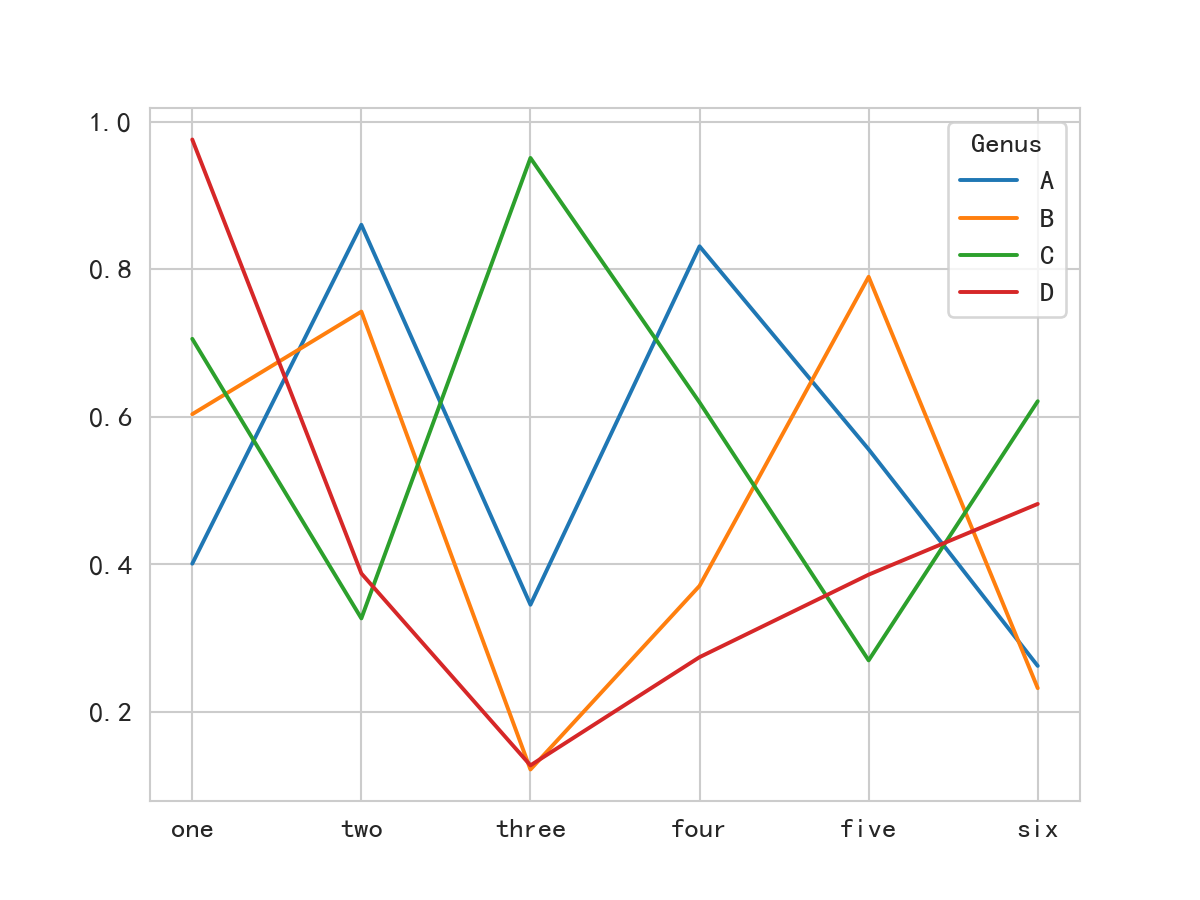

In [122]:
plt.show()
df.plot()

+ 索引的标题*Genus*用作图例的标题
+ 设置stacked=True即可为DataFrame生产堆积的柱状图。

<IPython.core.display.Javascript object>


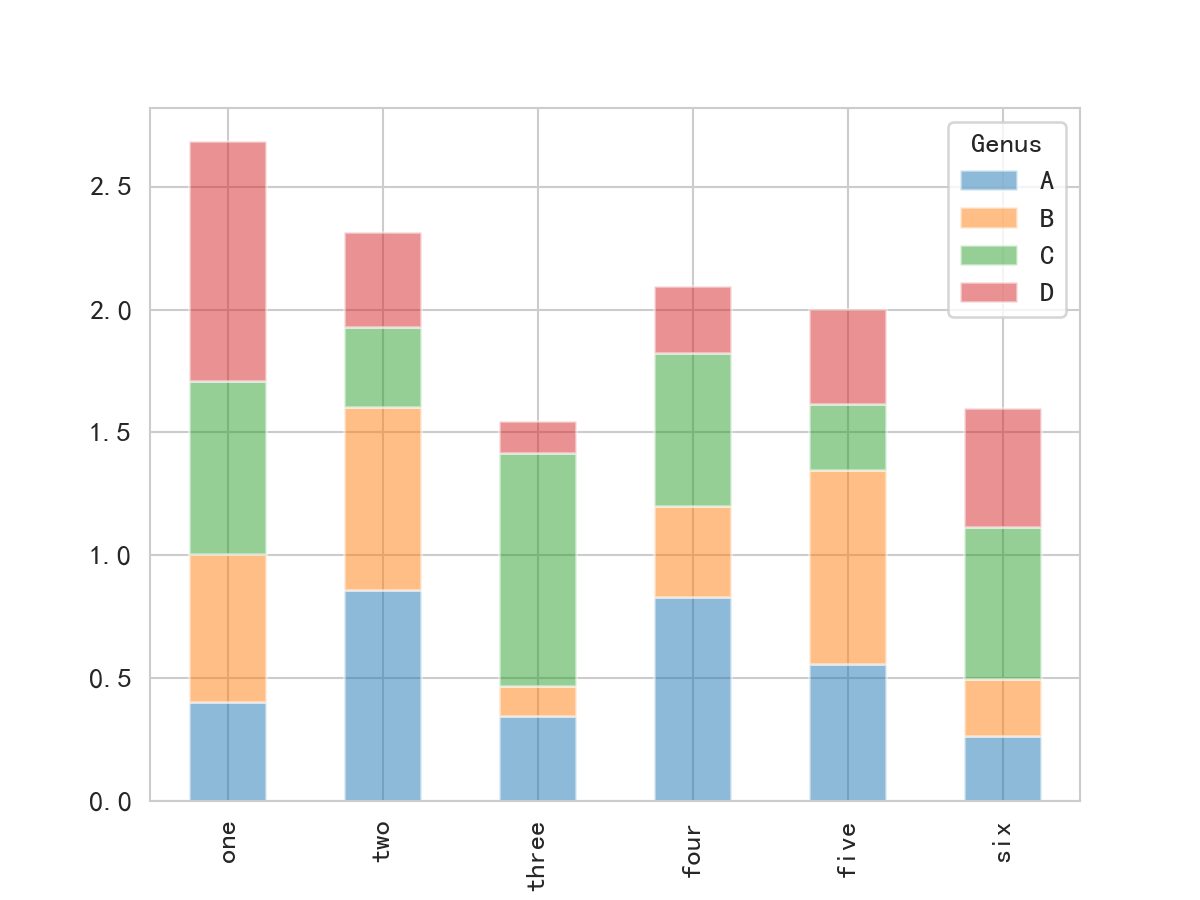

In [123]:
df.plot.bar(stacked=True, alpha=0.5)
plt.show()

<IPython.core.display.Javascript object>


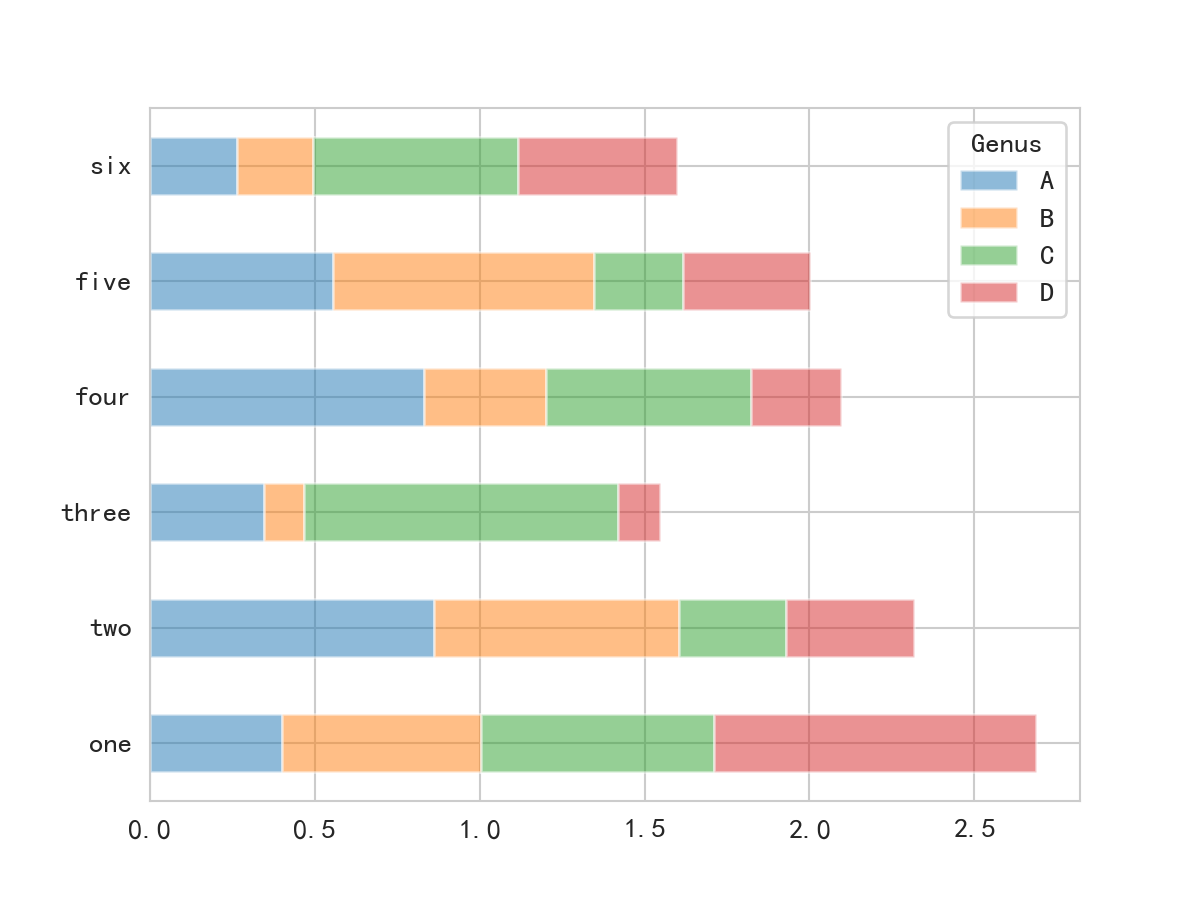

In [124]:
df.plot.barh(stacked=True, alpha=0.5)
plt.show()

In [42]:
plt.close('all')

+ 可以利用`value_counts`图形化显示Series中各值出现的频率，譬如:`s.value_counts().plot.bar()`

In [43]:
tips = pd.read_csv('examples/tips.csv')
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3

<IPython.core.display.Javascript object>


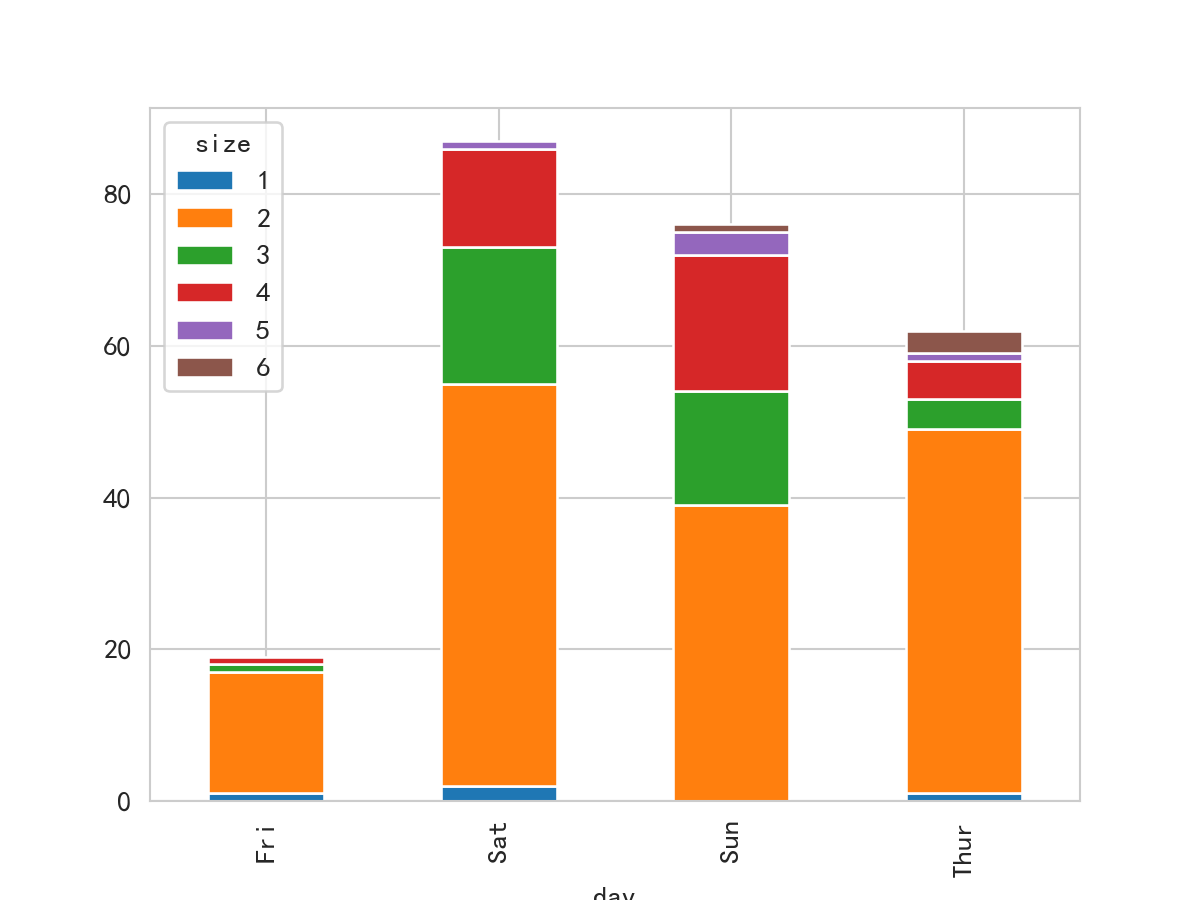

In [125]:
party_counts = pd.crosstab(tips['day'], tips['size']) # 计算分组频率的特殊透视表
party_counts
# Not many 1- and 6-person parties
party_counts.plot.bar(stacked=True)
plt.show()

In [163]:
party_counts
party_counts = party_counts.loc[:, 2:5]


size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3

size         1         2         3         4         5         6
day                                                             
Fri   0.052632  0.842105  0.052632  0.052632  0.000000  0.000000
Sat   0.022989  0.609195  0.206897  0.149425  0.011494  0.000000
Sun   0.000000  0.513158  0.197368  0.236842  0.039474  0.013158
Thur  0.016129  0.774194  0.064516  0.080645  0.016129  0.048387

<IPython.core.display.Javascript object>


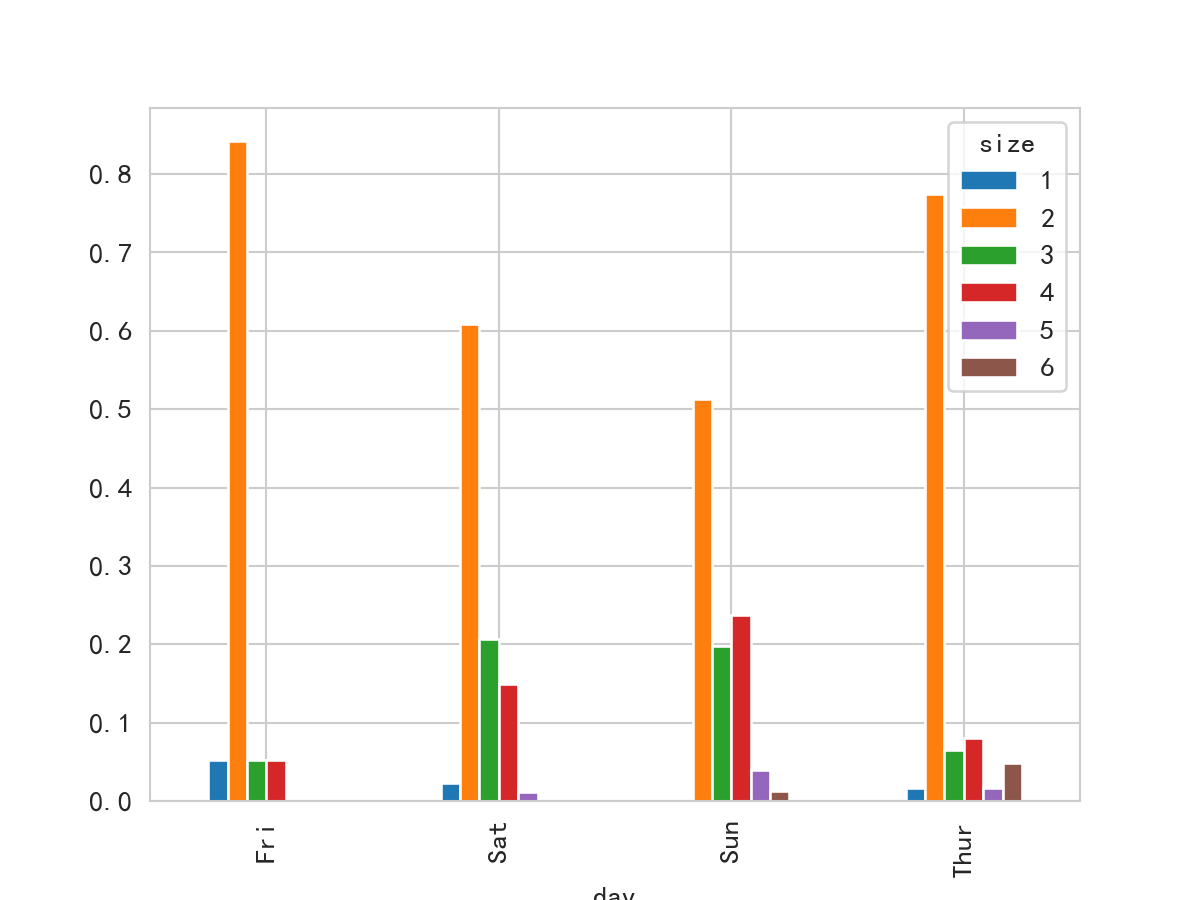

In [127]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis=1), axis=0)
party_pcts
party_pcts.plot.bar()
plt.show()

## 直方图和密度图

<IPython.core.display.Javascript object>


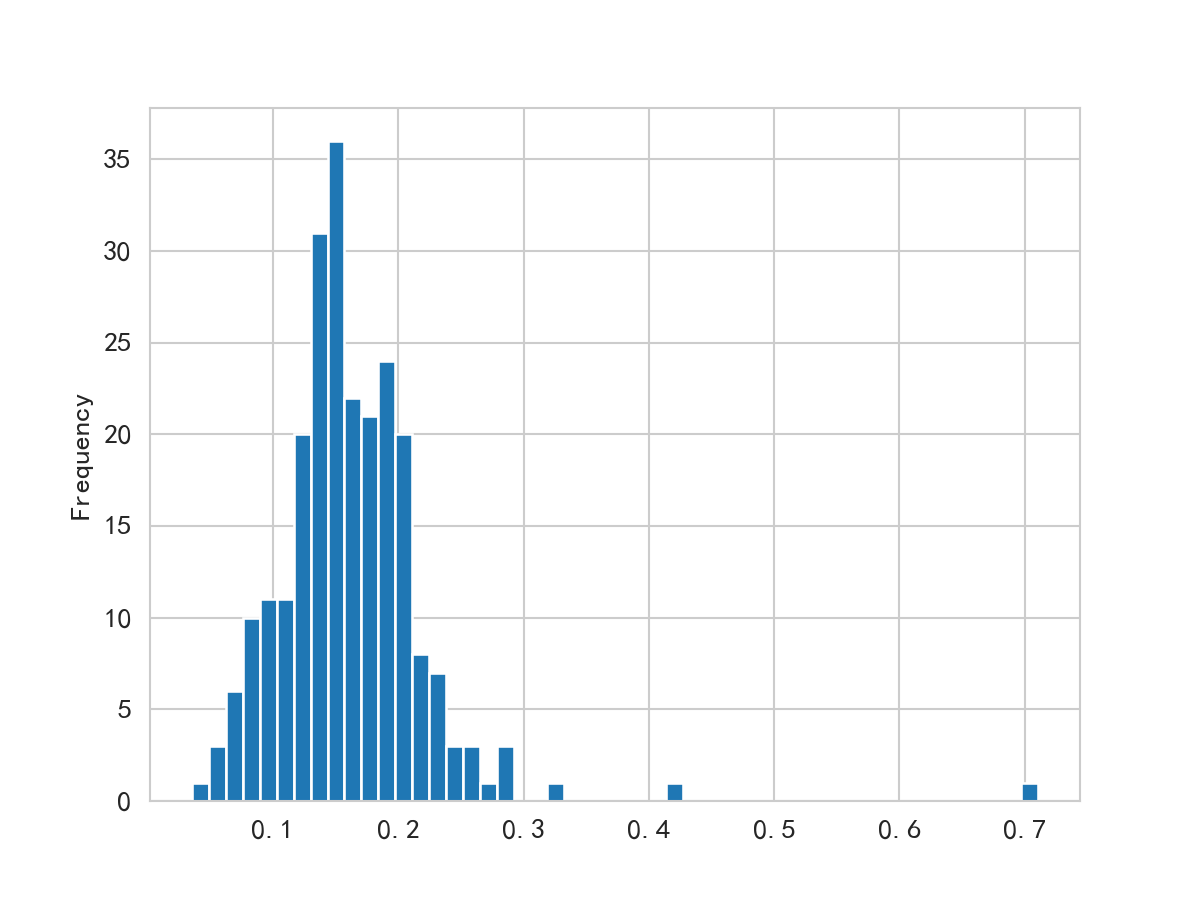

<IPython.core.display.Javascript object>


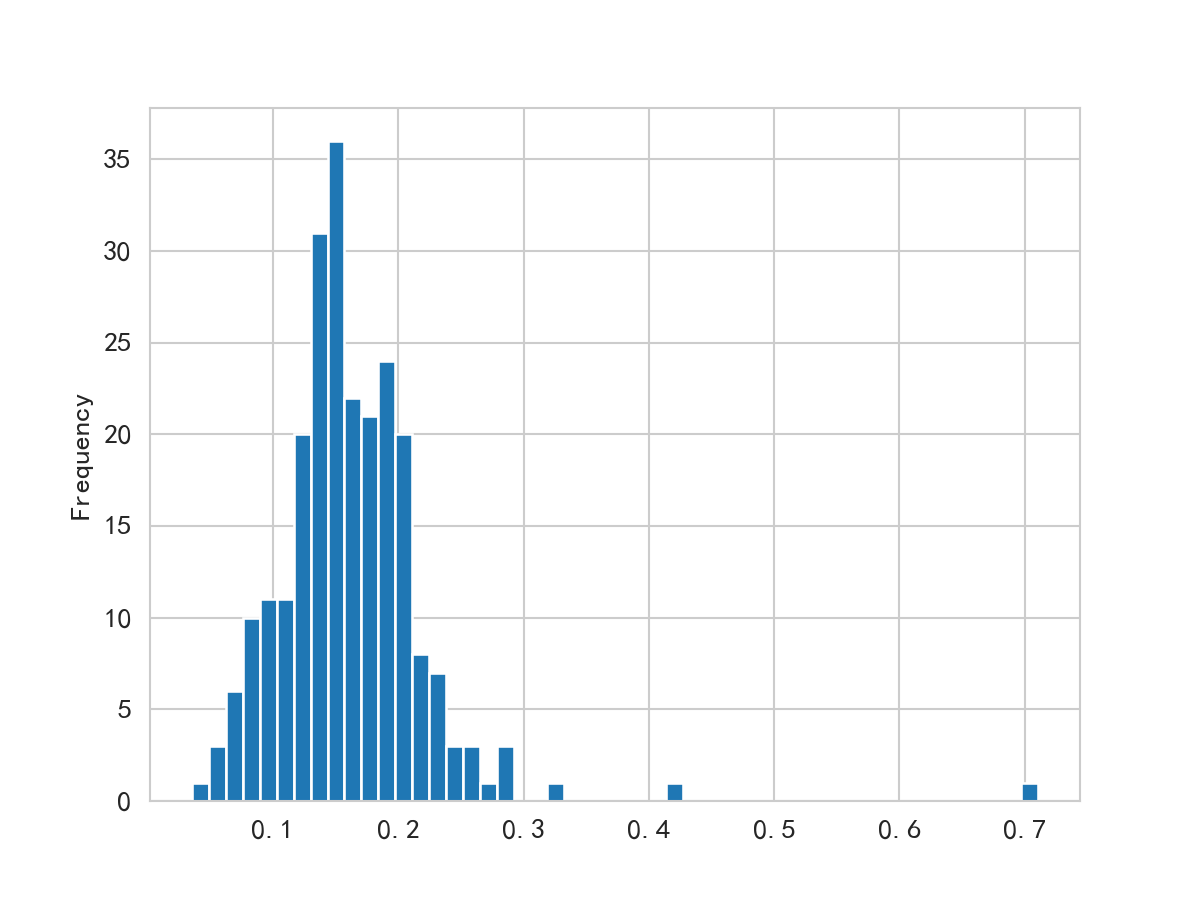

In [128]:
plt.figure()

In [165]:
tips['tip_pct'] = tips['tip'] / tips['total_bill'] # 小费占消费总额的百分比
tips

total_bill   tip     sex smoker   day    time  size   tip_pct
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
1         10.34  1.66    Male     No   Sun  Dinner     3  0.160542
2         21.01  3.50    Male     No   Sun  Dinner     3  0.166587
3         23.68  3.31    Male     No   Sun  Dinner     2  0.139780
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808
..          ...   ...     ...    ...   ...     ...   ...       ...
239       29.03  5.92    Male     No   Sat  Dinner     3  0.203927
240       27.18  2.00  Female    Yes   Sat  Dinner     2  0.073584
241       22.67  2.00    Male    Yes   Sat  Dinner     2  0.088222
242       17.82  1.75    Male     No   Sat  Dinner     2  0.098204
243       18.78  3.00  Female     No  Thur  Dinner     2  0.159744

[244 rows x 8 columns]

In [167]:
%matplotlib notebook

<IPython.core.display.Javascript object>


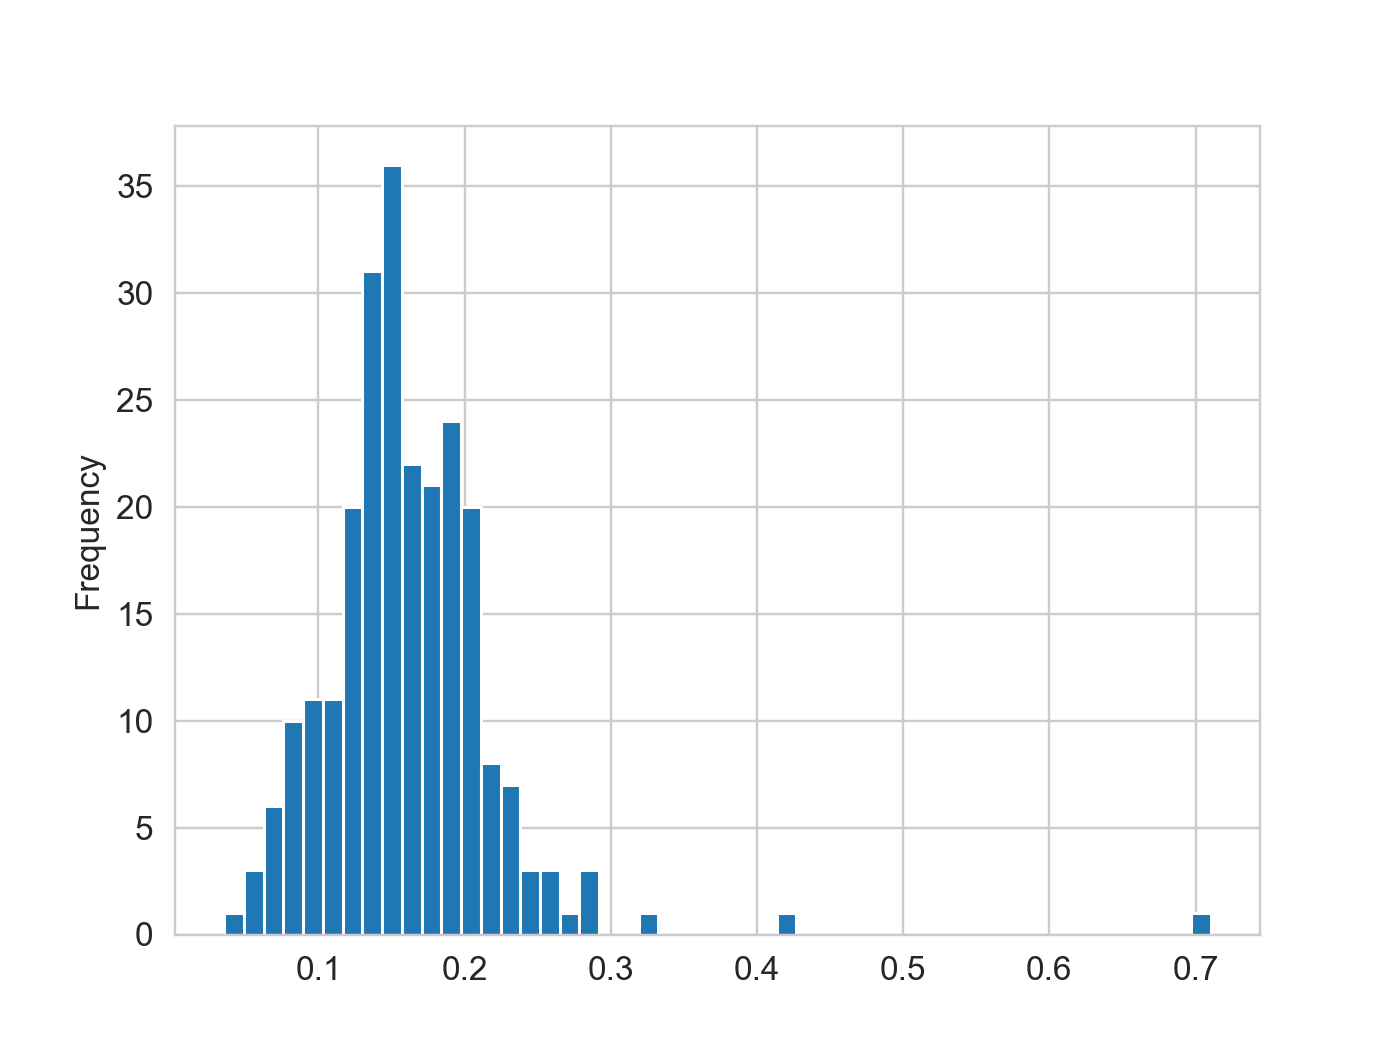

In [168]:
tips['tip_pct'].plot.hist(bins=50)
plt.show()

<IPython.core.display.Javascript object>


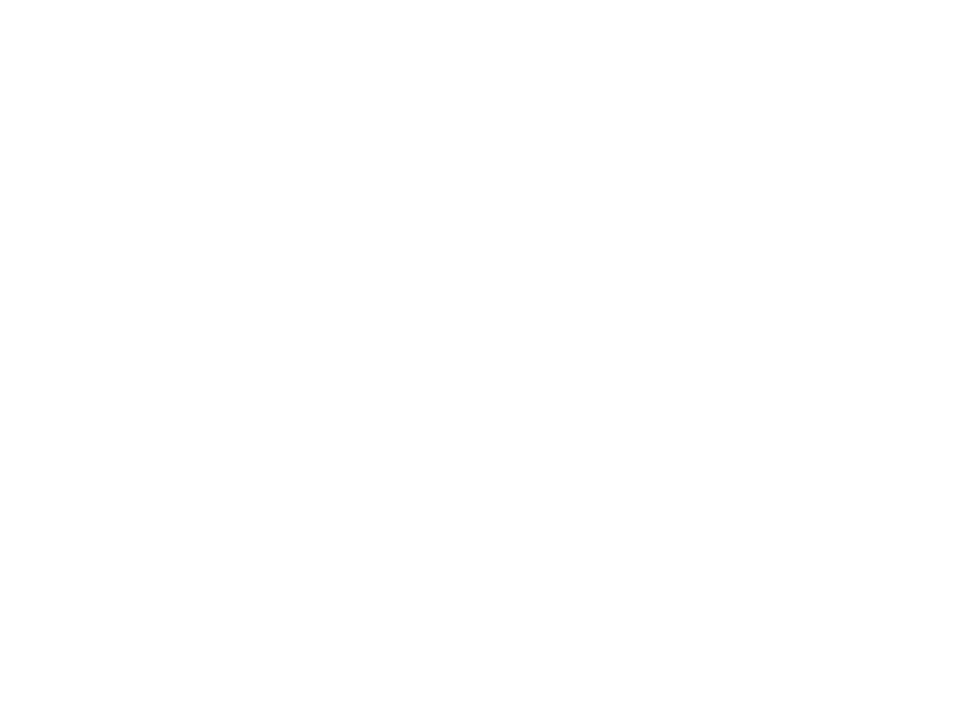

<IPython.core.display.Javascript object>


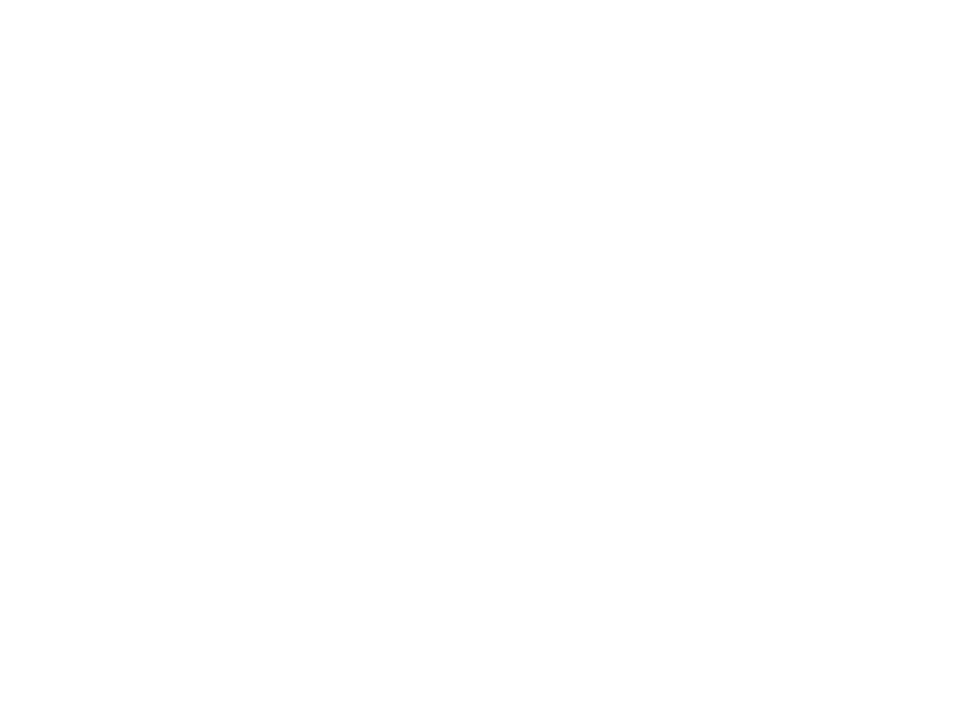

In [50]:
plt.figure()

<IPython.core.display.Javascript object>


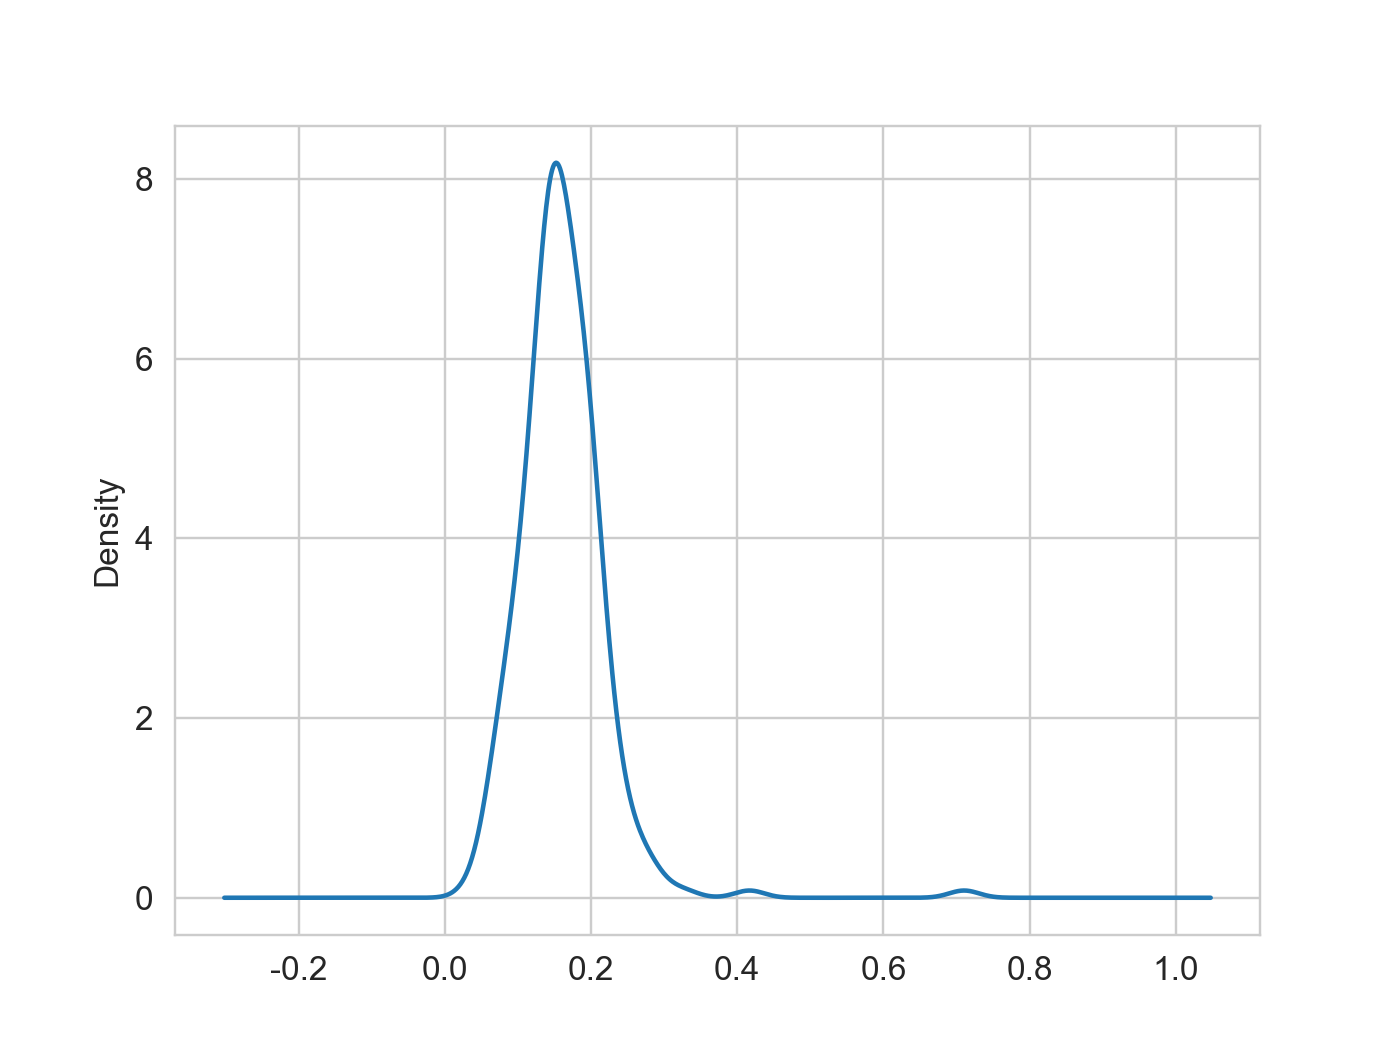

In [169]:
tips['tip_pct'].plot.density() # 等价于plot(kind='kde')
plt.show()

<IPython.core.display.Javascript object>


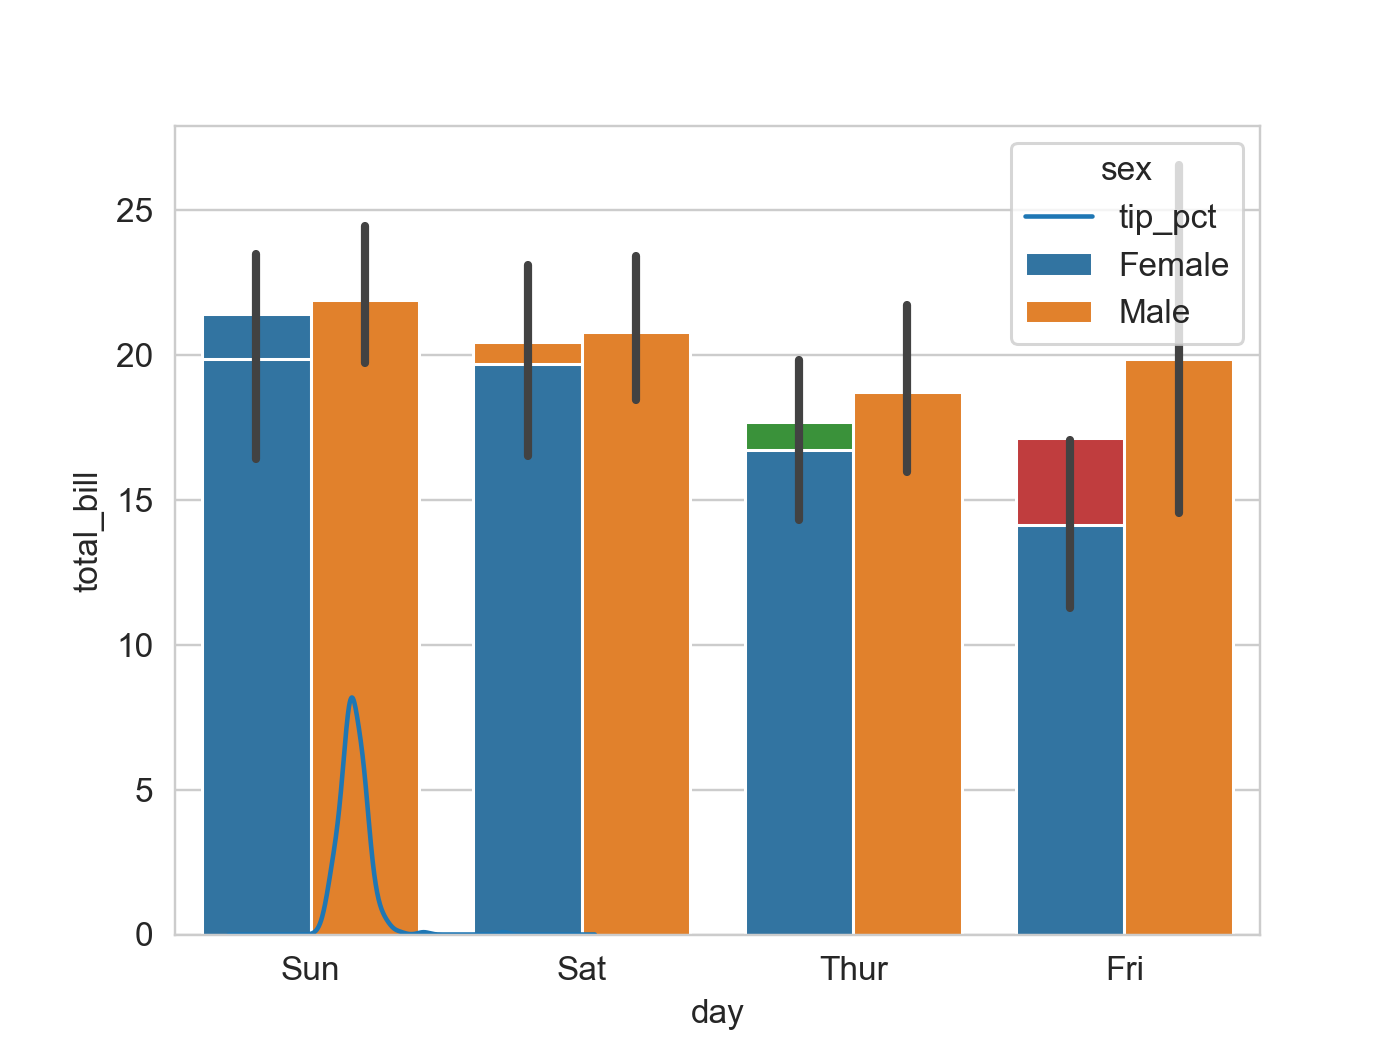

<IPython.core.display.Javascript object>


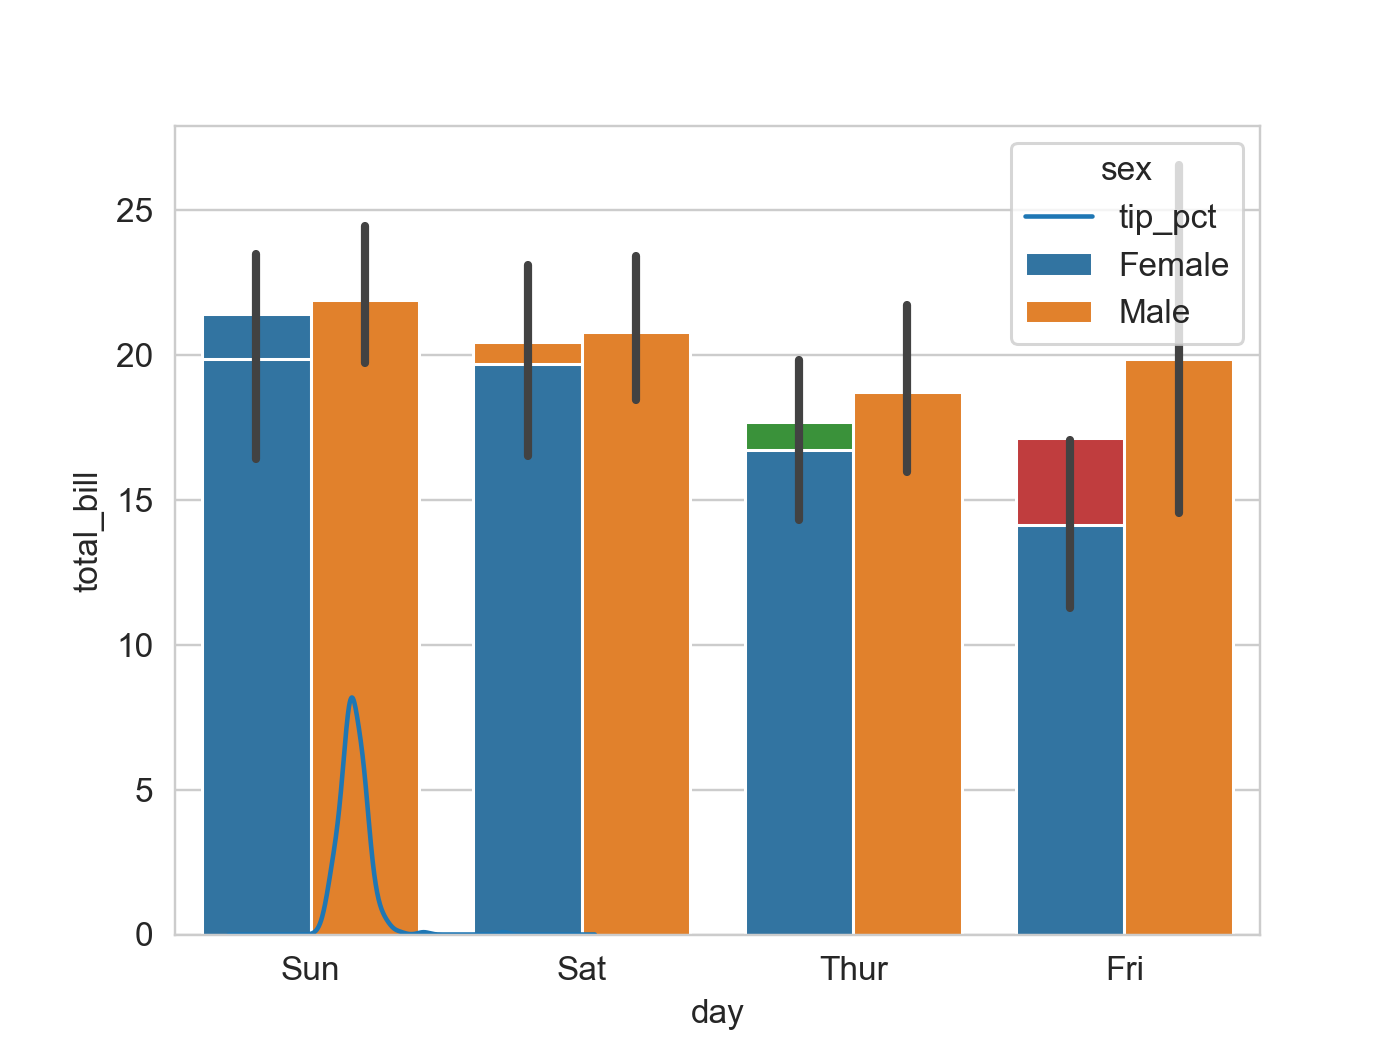

In [170]:
plt.figure()
tips['tip_pct'].plot(kind='kde')
plt.show()

## 散布图

In [53]:
macro = pd.read_csv('examples/macrodata.csv')
macro

year  quarter    realgdp  realcons   realinv  realgovt  realdpi  \
0    1959.0      1.0   2710.349    1707.4   286.898   470.045   1886.9   
1    1959.0      2.0   2778.801    1733.7   310.859   481.301   1919.7   
2    1959.0      3.0   2775.488    1751.8   289.226   491.260   1916.4   
3    1959.0      4.0   2785.204    1753.7   299.356   484.052   1931.3   
4    1960.0      1.0   2847.699    1770.5   331.722   462.199   1955.5   
..      ...      ...        ...       ...       ...       ...      ...   
198  2008.0      3.0  13324.600    9267.7  1990.693   991.551   9838.3   
199  2008.0      4.0  13141.920    9195.3  1857.661  1007.273   9920.4   
200  2009.0      1.0  12925.410    9209.2  1558.494   996.287   9926.4   
201  2009.0      2.0  12901.504    9189.0  1456.678  1023.528  10077.5   
202  2009.0      3.0  12990.341    9256.0  1486.398  1044.088  10040.6   

         cpi      m1  tbilrate  unemp      pop  infl  realint  
0     28.980   139.7      2.82    5.8  177.146  0.00     0.00  
1     29.150   141.7      3.08    5.1  177.830  2.34     0.74  
2     29.350   140.5      3.82    5.3  178.657  2.74     1.09  
3     29.370   140.0      4.33    5.6  179.386  0.27     4.06  
4     29.540   139.6      3.50    5.2  180.007  2.31     1.19  
..       ...     ...       ...    ...      ...   ...      ...  
198  216.889  1474.7      1.17    6.0  305.270 -3.16     4.33  
199  212.174  1576.5      0.12    6.9  305.952 -8.79     8.91  
200  212.671  1592.8      0.22    8.1  306.547  0.94    -0.71  
201  214.469  1653.6      0.18    9.2  307.226  3.37    -3.19  
202  216.385  1673.9      0.12    9.6  308.013  3.56    -3.44  

[203 rows x 14 columns]

In [54]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
np.log(data)[-5:]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

cpi        m1  tbilrate     unemp
198  5.379386  7.296210  0.157004  1.791759
199  5.357407  7.362962 -2.120264  1.931521
200  5.359746  7.373249 -1.514128  2.091864
201  5.368165  7.410710 -1.714798  2.219203
202  5.377059  7.422912 -2.120264  2.261763

cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560

<IPython.core.display.Javascript object>


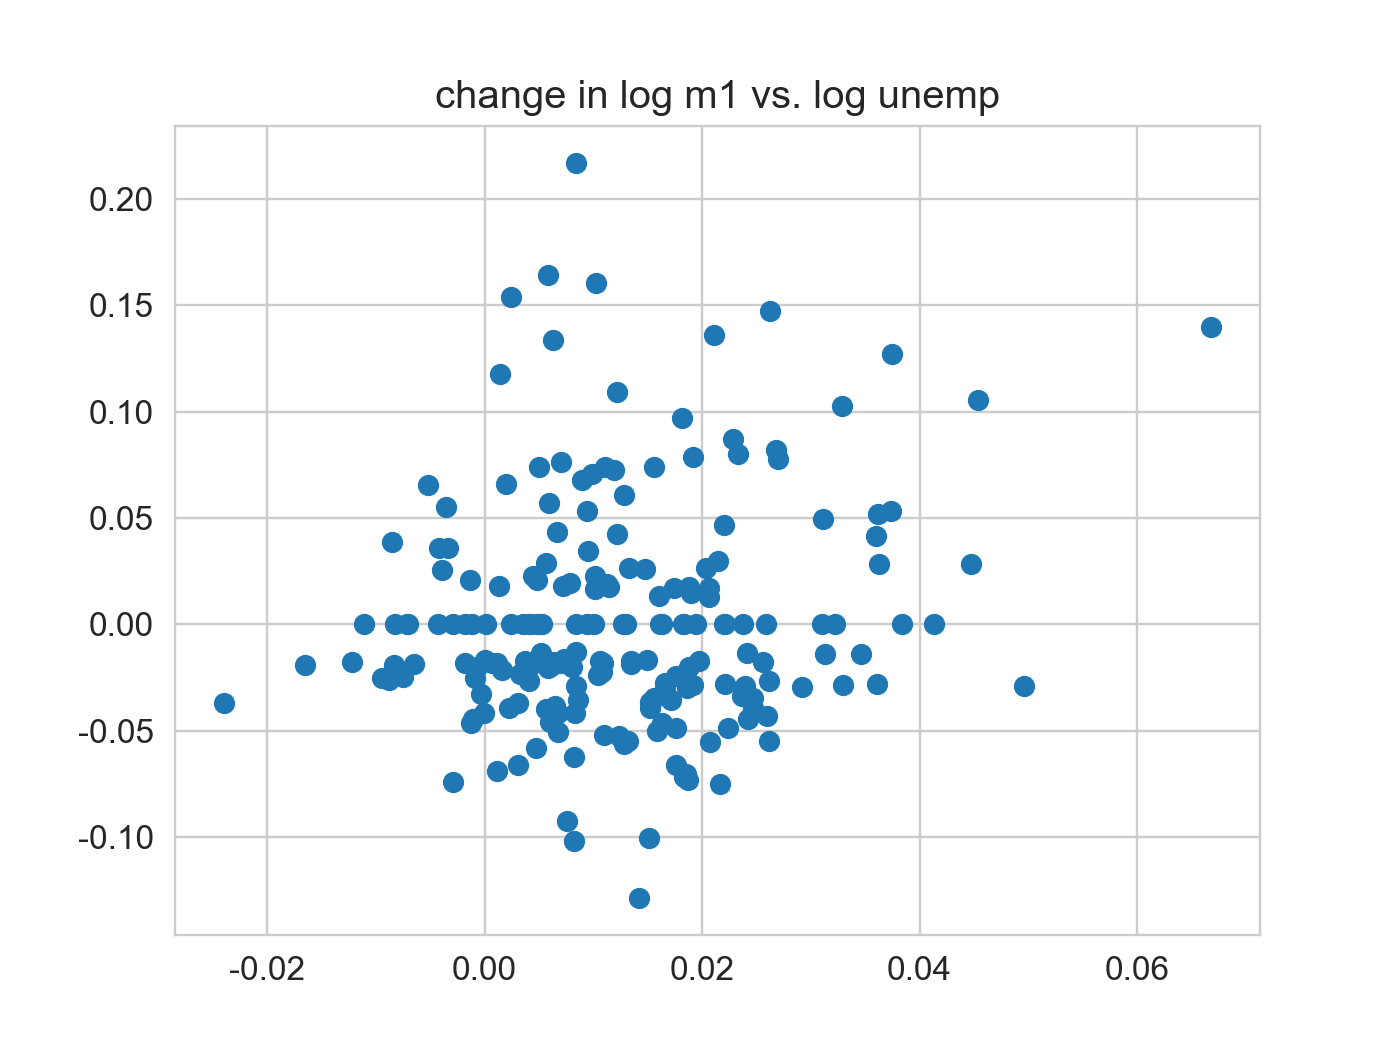

<IPython.core.display.Javascript object>


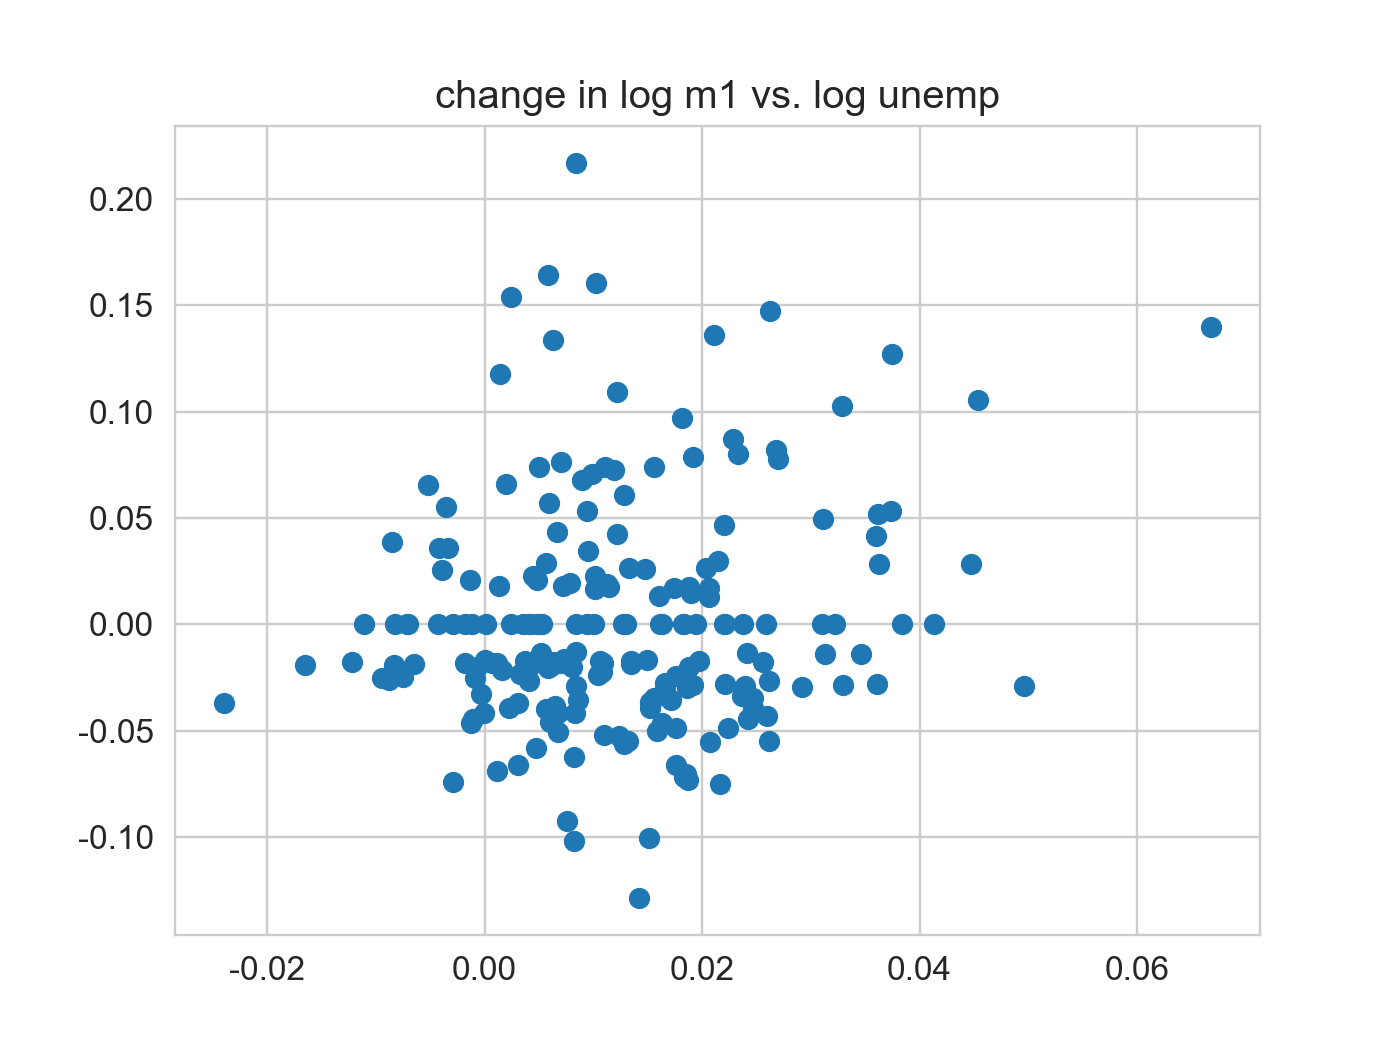

Text(0.5, 1.0, 'change in log m1 vs. log unemp')

In [171]:
plt.figure()
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title("change in log %s vs. log %s" % ('m1', 'unemp'))
plt.show()

+ pandas 提供了一个能从DataFrame创建散布矩阵的`scatter_matrix`函数，

<IPython.core.display.Javascript object>


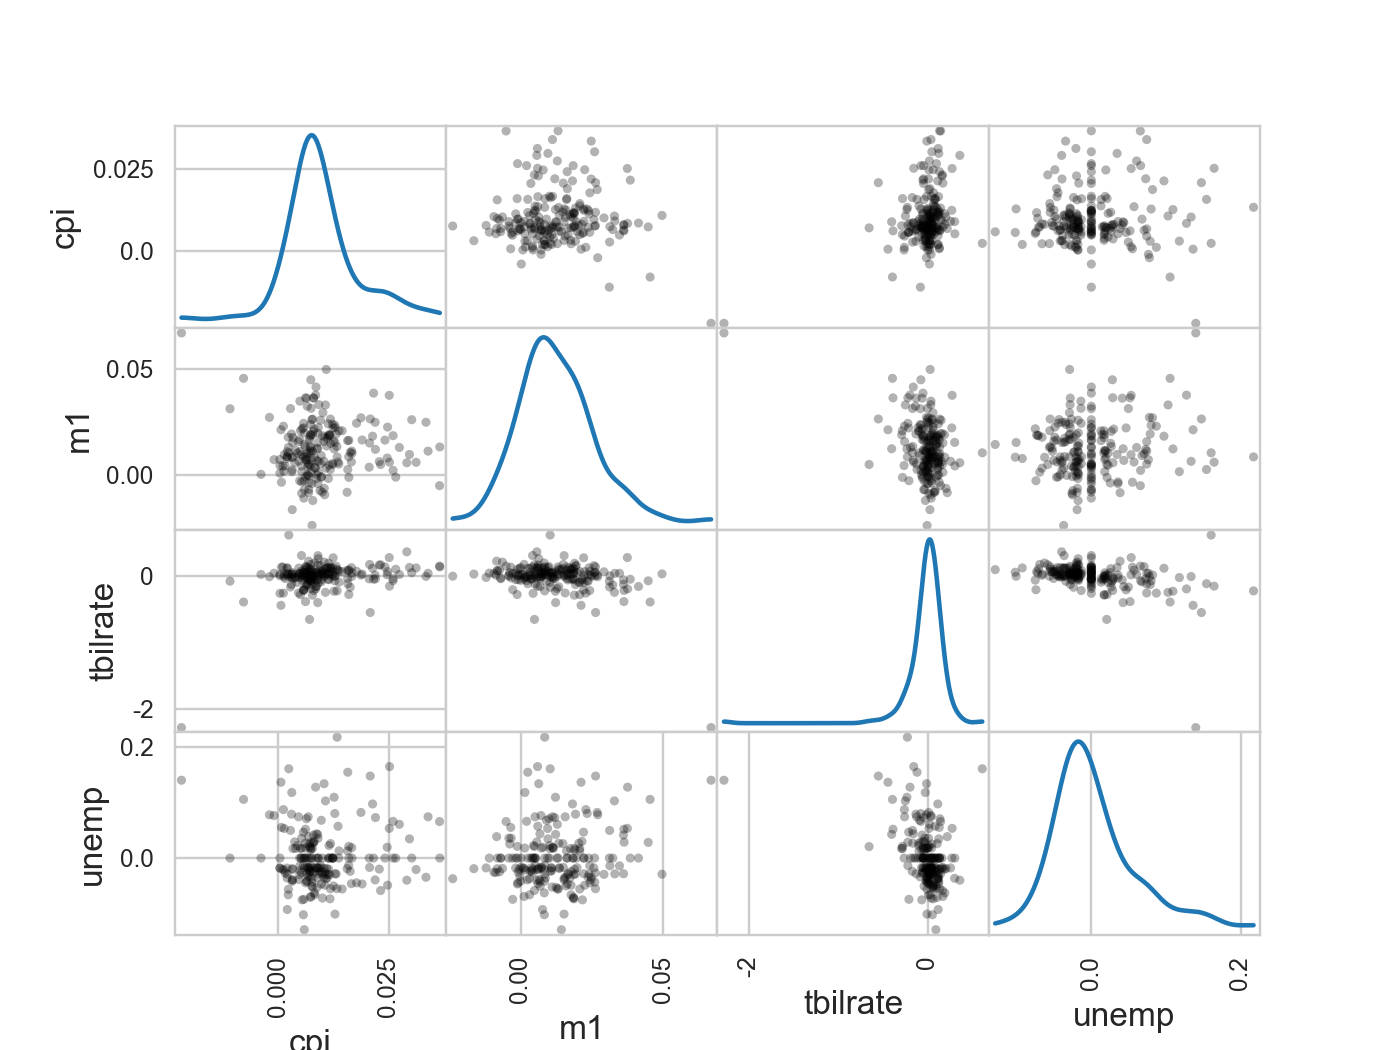

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AB80EC3148>,
      dtype=object)

In [172]:
pd.plotting.scatter_matrix(trans_data, diagonal='kde', 
                           color='k', alpha=0.3)
plt.show()

# Seaborn画图
Seaborn在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易。

## 箱线图

In [139]:
%matplotlib notebook
import seaborn as sns

In [135]:
sns.set_style("whitegrid")
tips = pd.read_csv("./examples/tips.csv")

In [136]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<IPython.core.display.Javascript object>


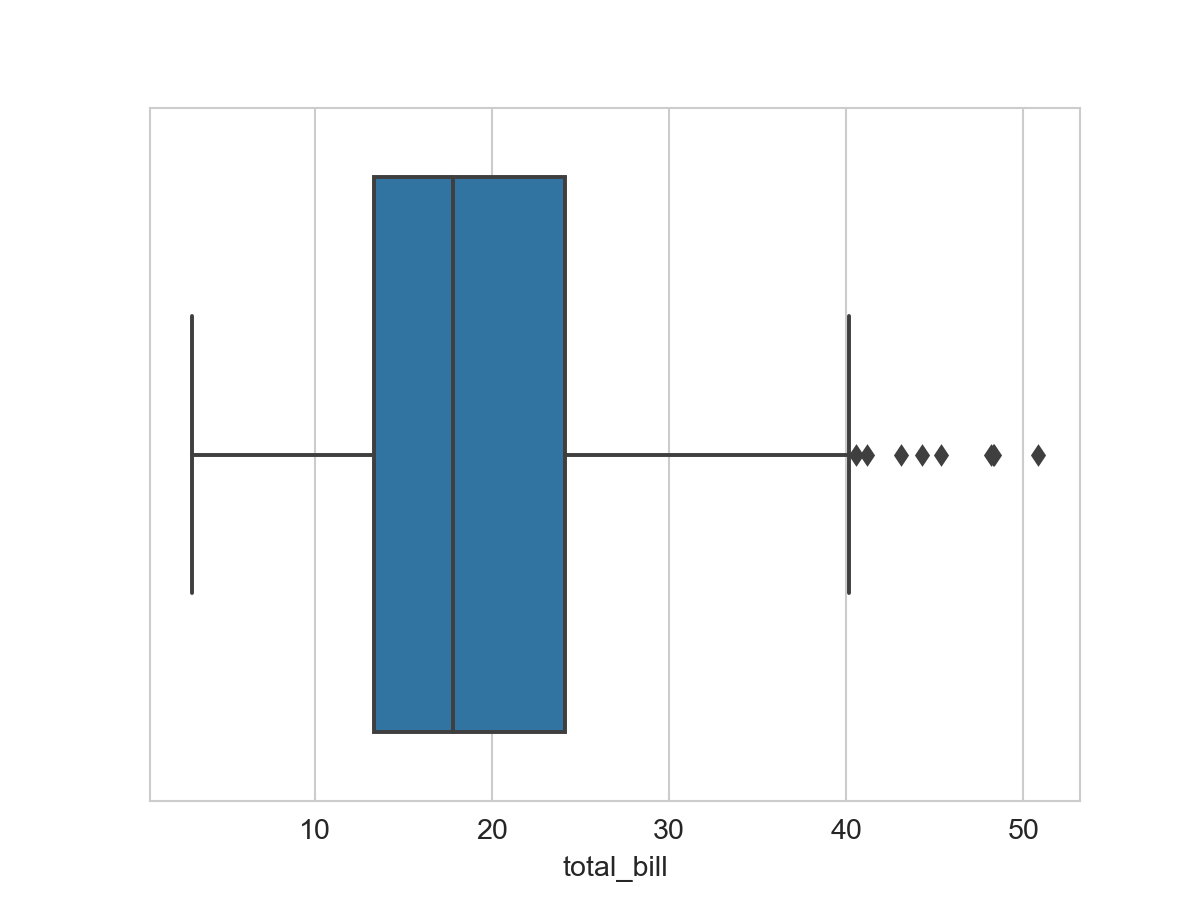

In [142]:
# 绘制箱线图
ax = sns.boxplot(x=tips["total_bill"])

<IPython.core.display.Javascript object>


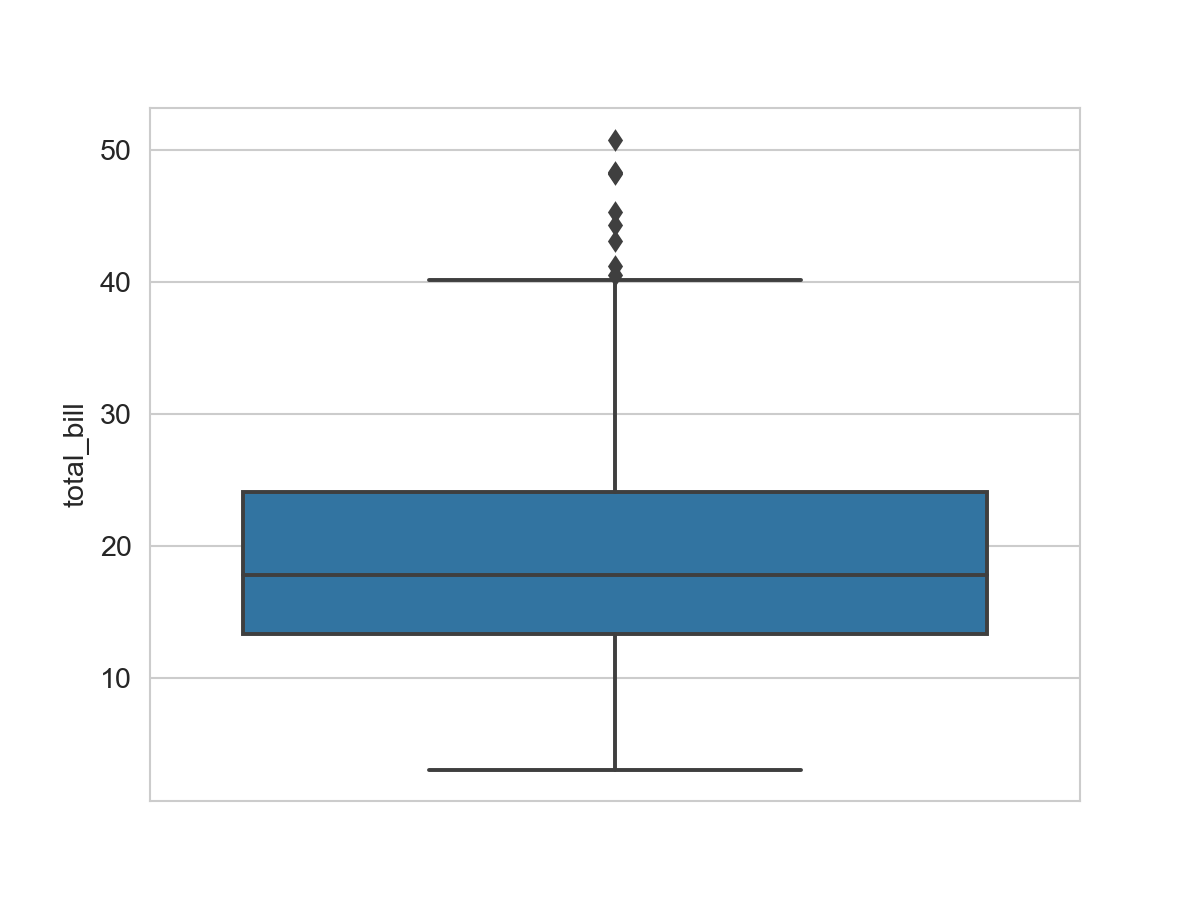

In [143]:
# 竖着放的箱线图，也就是将x换成y
ax = sns.boxplot(y=tips["total_bill"])
plt.show()

<IPython.core.display.Javascript object>


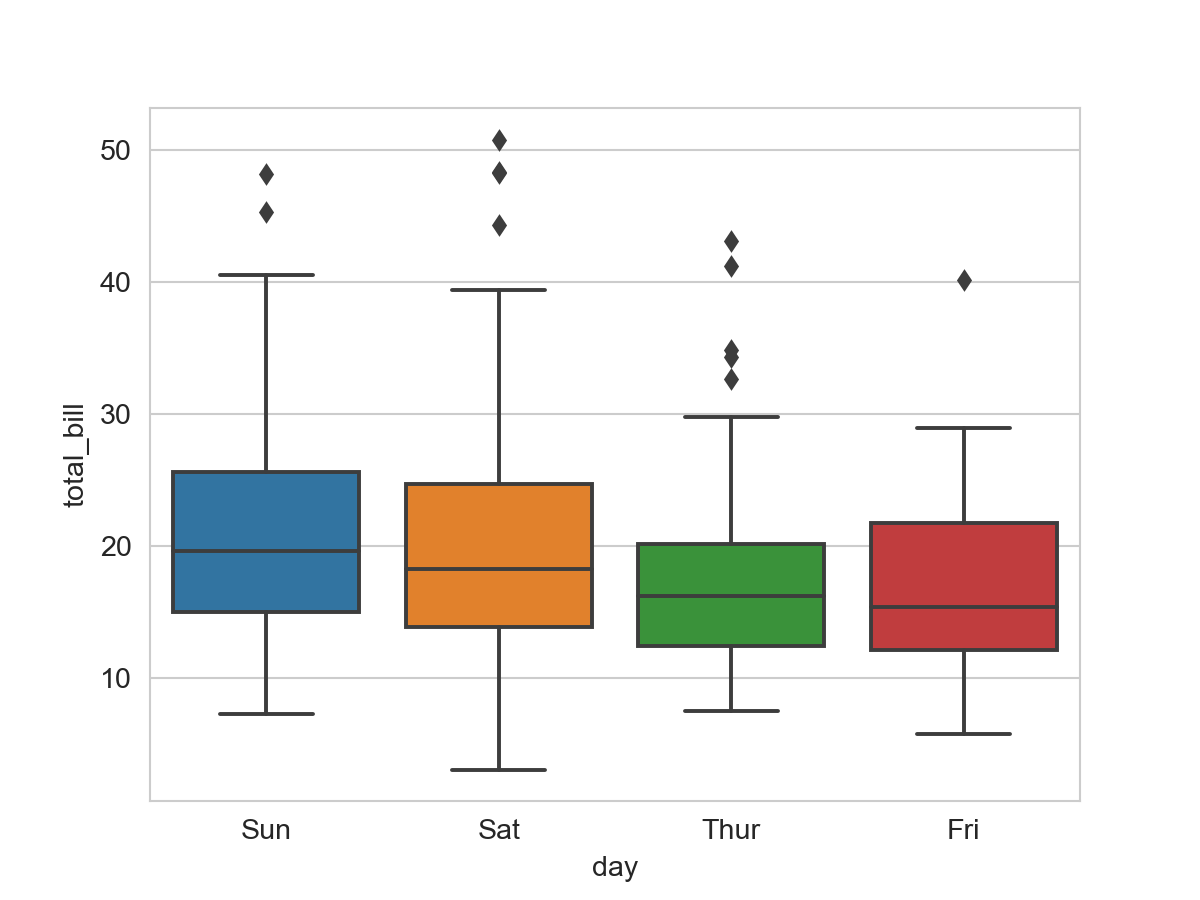

In [144]:
# 分组绘制箱线图，分组因子是day，在x轴不同位置绘制
ax = sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

<IPython.core.display.Javascript object>


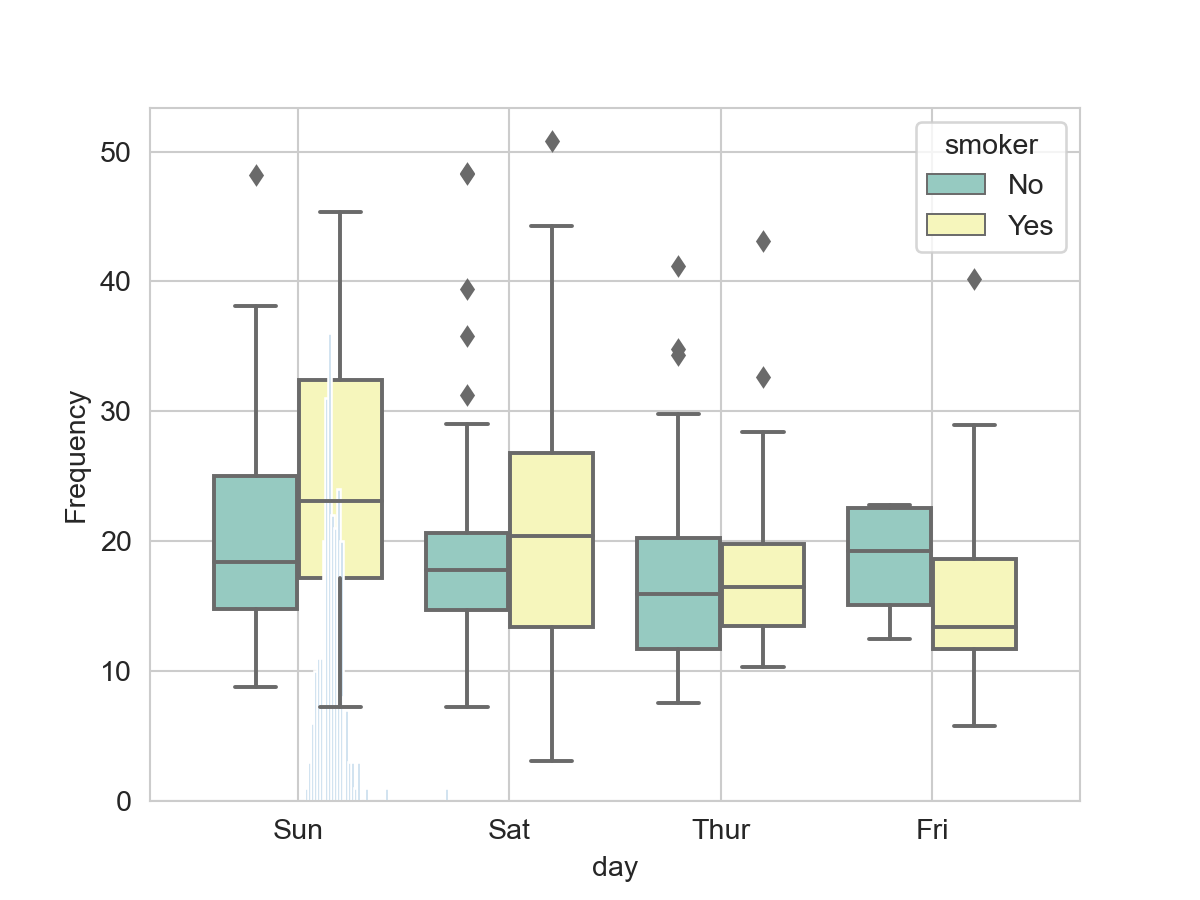

In [145]:
# 分组箱线图，分子因子是smoker，不同的因子用不同颜色区分
# 相当于分组之后又分组
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
                 data=tips, palette="Set3")
plt.show()

<IPython.core.display.Javascript object>


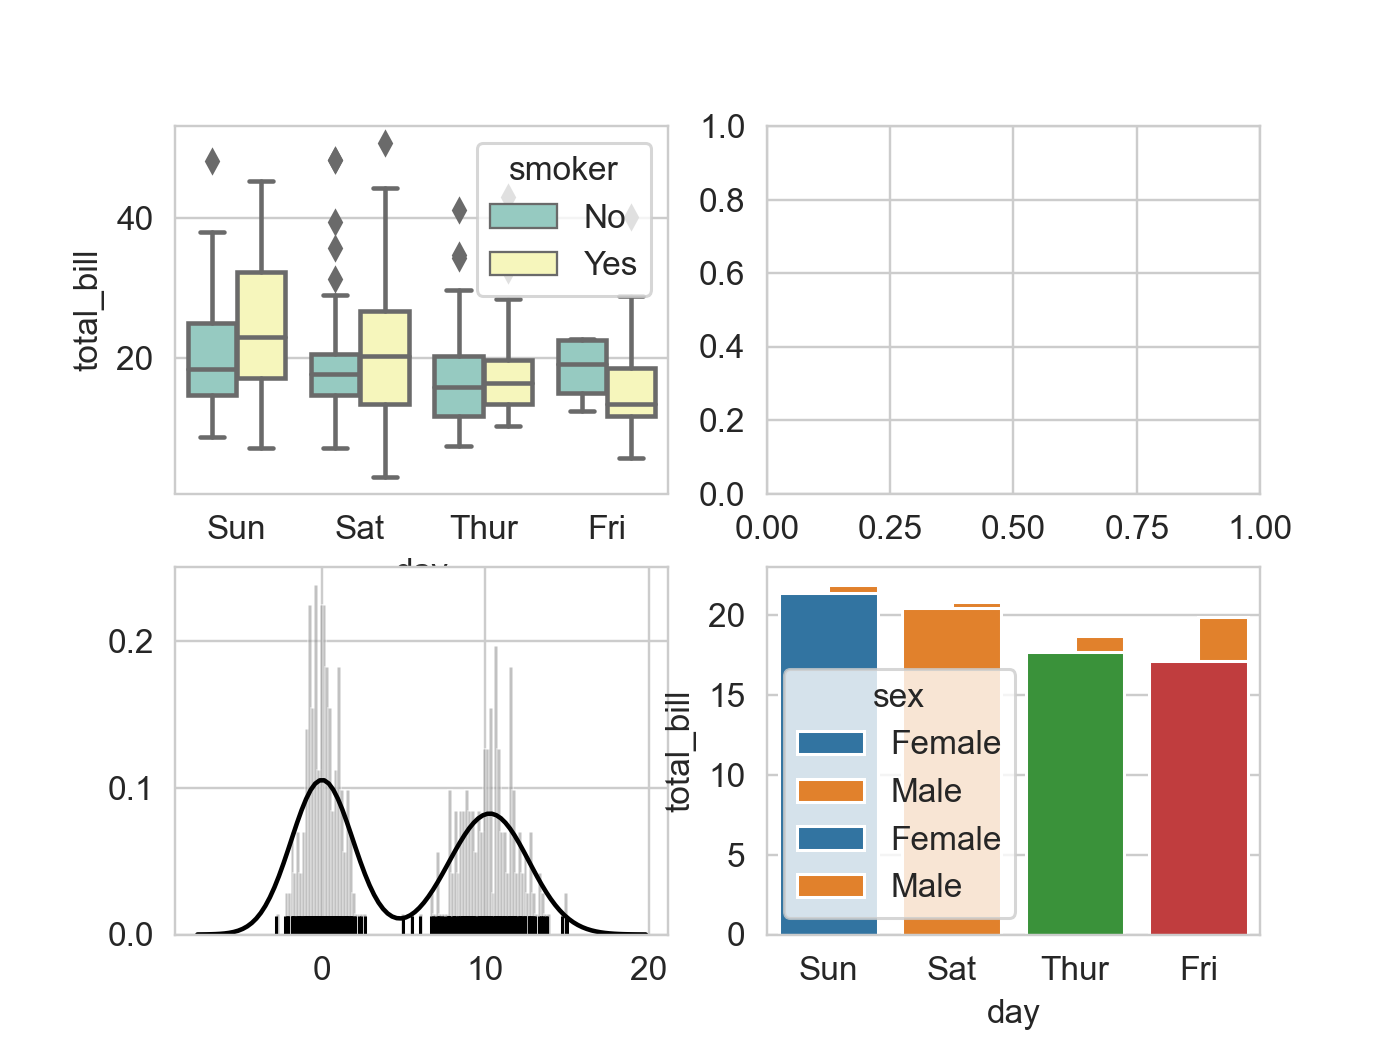

In [174]:
fig,axes = plt.subplots(2,2)

In [175]:
sns.boxplot(x="day", y="total_bill", hue="smoker",
                 data=tips, palette="Set3",ax=axes[0][0])


In [178]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips, ci=0,ax=axes[1][1])

In [177]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k',rug=True,ax=axes[1][0])

## barplot直方图

+ seaborn的`barplot()`利用矩阵条的高度反映数值变量的集中趋势，以及使用errorbar功能（差棒图）来估计变量之间的差值统计。请谨记`barplot`展示的是某种变量分布的平均值，当需要精确观察每类变量的分布趋势，`boxplot`与`violinplot`往往是更好的选择。

```Python
seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None,ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, ax=None, estimator=<function mean>，**kwargs)
```
Show point estimates and confidence intervals as rectangular bars.

<IPython.core.display.Javascript object>


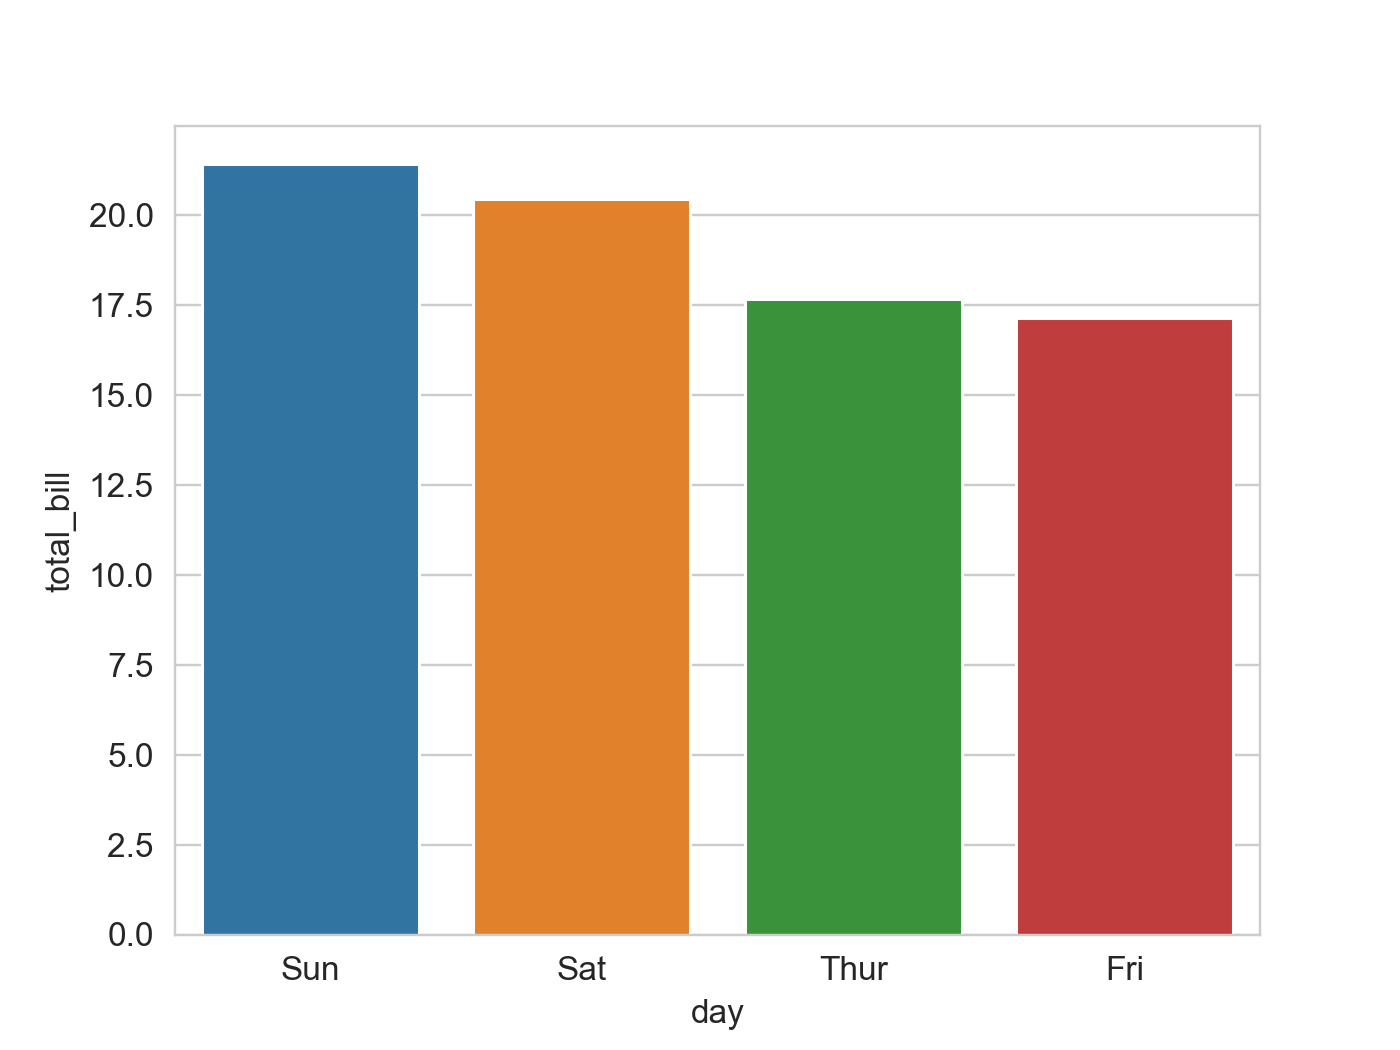

In [184]:
fig=plt.figure()
sns.set_style("whitegrid")
ax = sns.barplot(x="day", y="total_bill", data=tips,ci=0)
plt.show()


In [181]:
# 分组的柱状图
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.show()

In [70]:
# 绘制变量中位数的直方图，estimator指定统计函数
ax = sns.barplot(x="day", y="tip", data=tips, 
                    estimator=np.median,)
plt.show()

In [71]:
x = sns.barplot("size", y="total_bill", data=tips, 
                    palette="Blues_d")
plt.show()

## 回归图lmplot

<IPython.core.display.Javascript object>


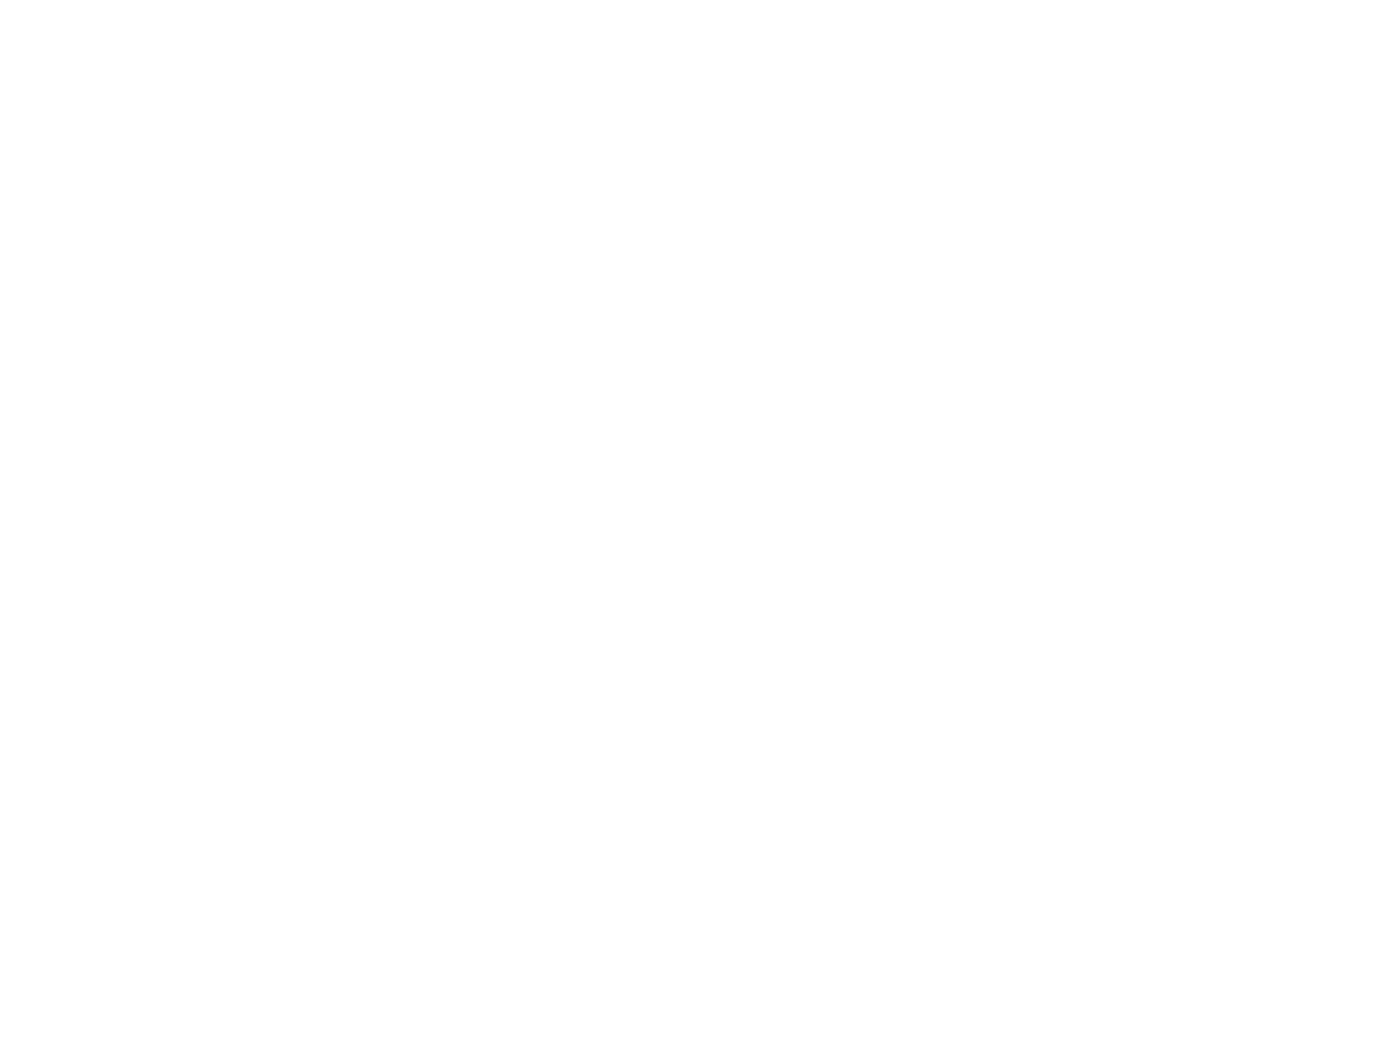

<IPython.core.display.Javascript object>


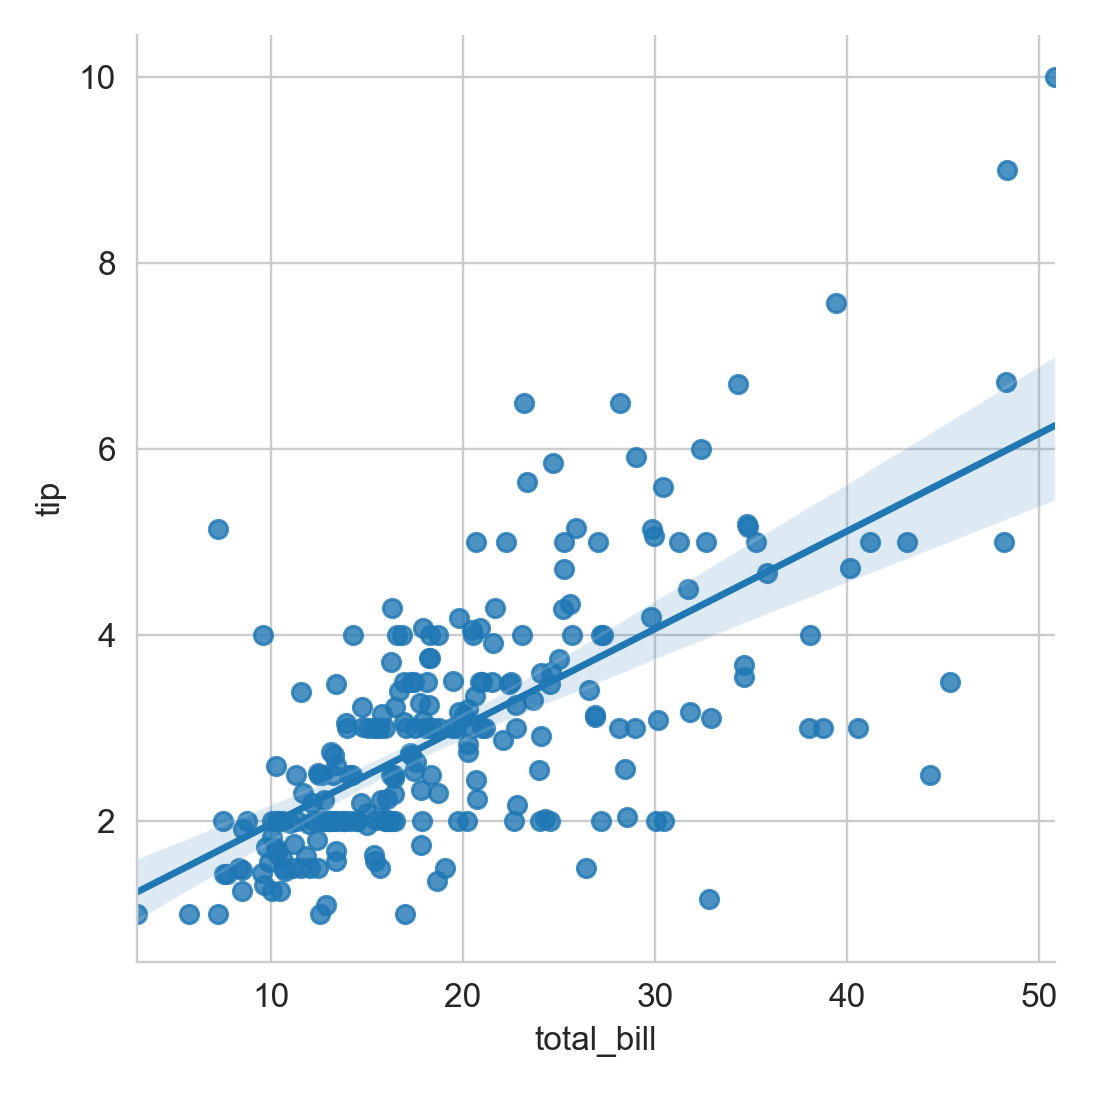

In [182]:
fig=plt.figure()
g = sns.lmplot(x="total_bill", y="tip", data=tips)
plt.show()

<IPython.core.display.Javascript object>


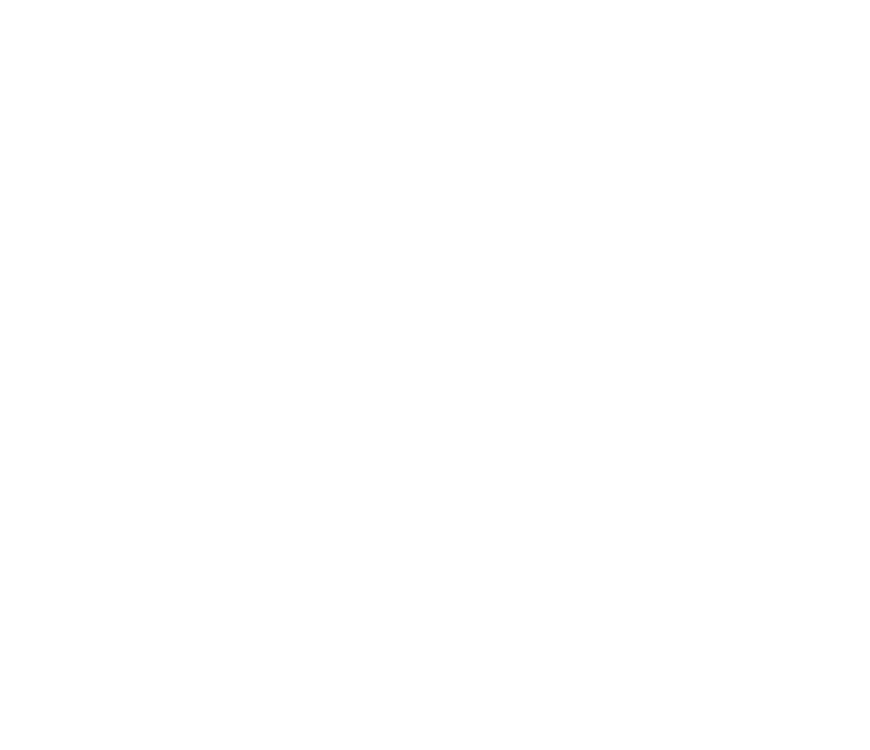

In [73]:
# 分组的线性回归图，通过hue参数控制
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)
plt.show()

<IPython.core.display.Javascript object>


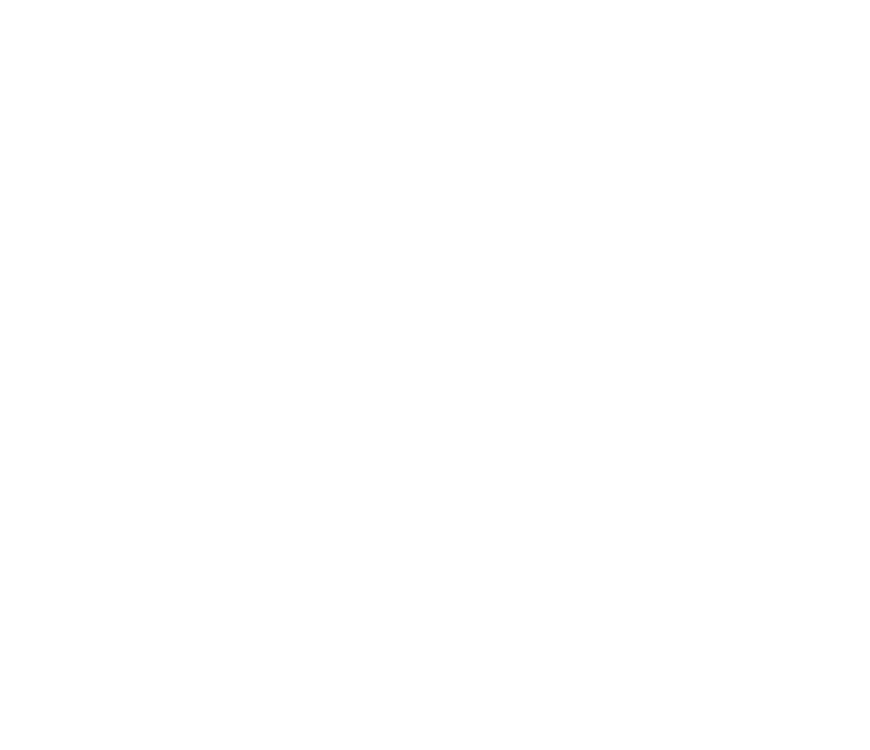

In [74]:
# 分组绘图，不同的组用不同的形状标记
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", 
                data=tips,markers=["o", "x"])
plt.show()

<IPython.core.display.Javascript object>


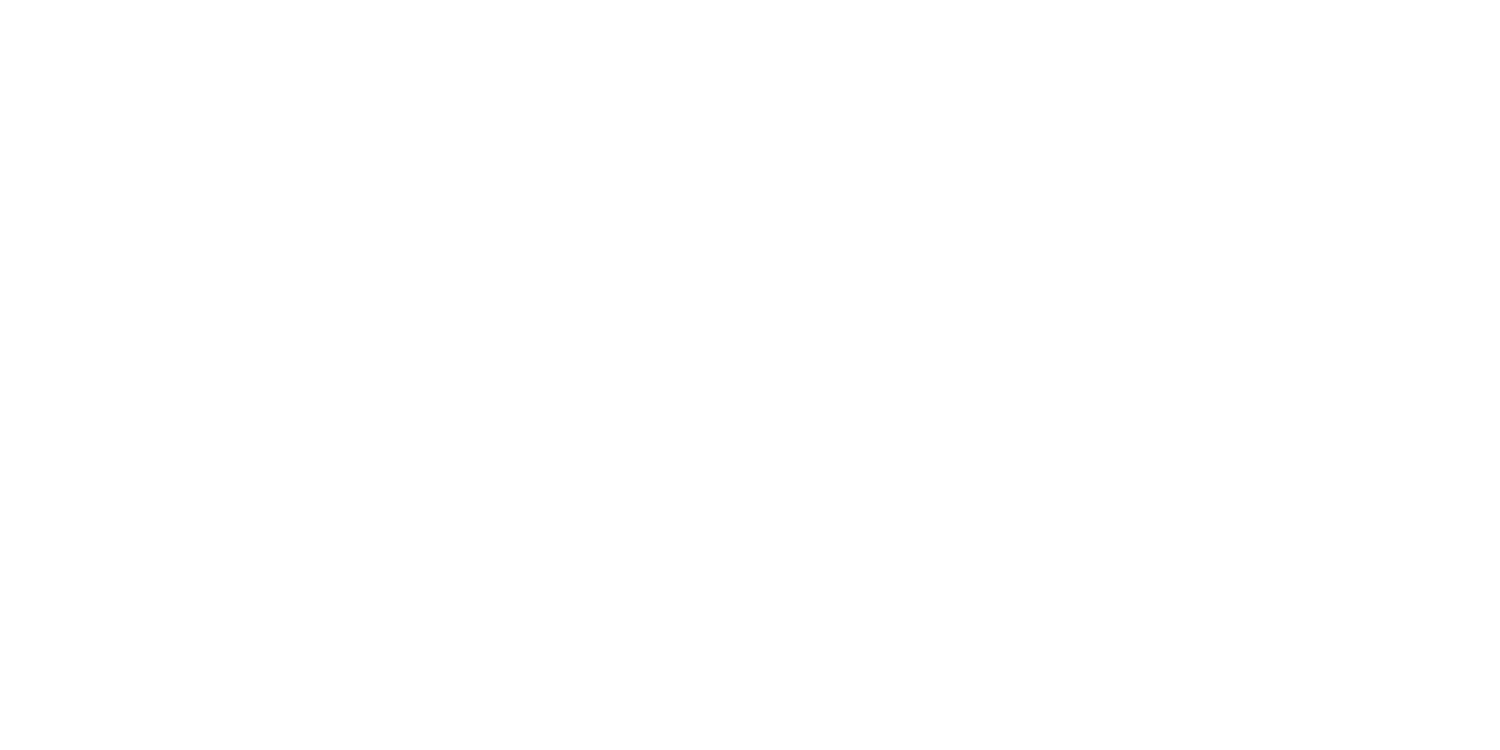

In [75]:
# 不仅分组，还分开不同的子图绘制，用col参数控制
g = sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips)
plt.show()

## barplot绘图 柱状图

In [76]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')
plt.show()

total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.063204
1       10.34  1.66    Male     No  Sun  Dinner     3  0.191244
2       21.01  3.50    Male     No  Sun  Dinner     3  0.199886
3       23.68  3.31    Male     No  Sun  Dinner     2  0.162494
4       24.59  3.61  Female     No  Sun  Dinner     4  0.172069

## `sns.regplot`线性回归拟合图

<IPython.core.display.Javascript object>


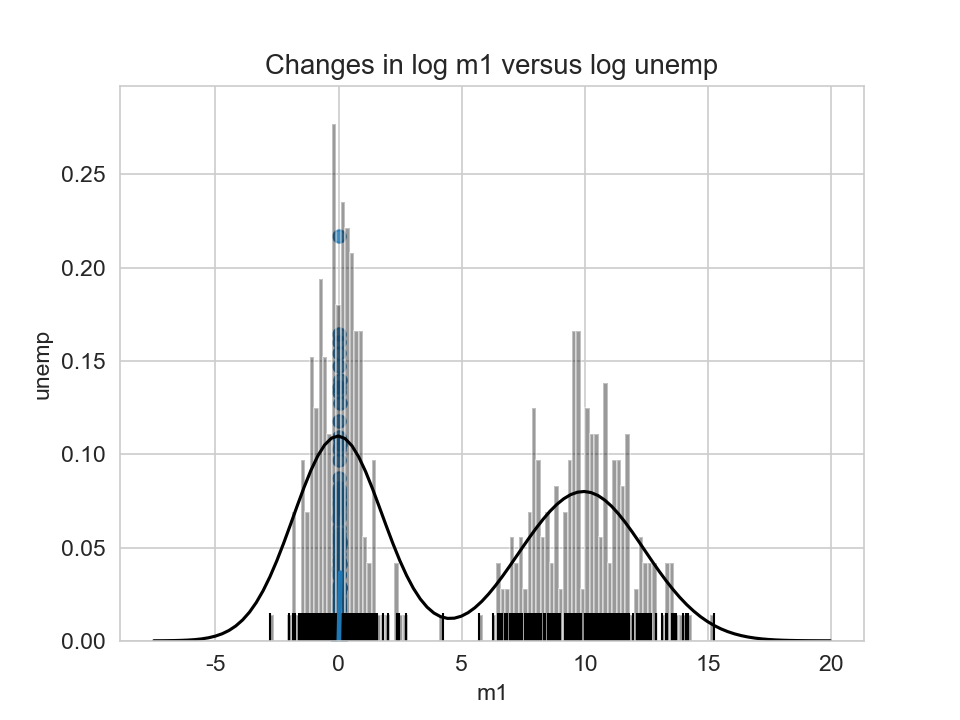

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

In [77]:
plt.close('all')
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))
plt.show()

+ seaborn的`displot()`集合了matplotlib的hist()与核函数估计kdeplot的功能，增加了rugplot分布观测条显示与利用scipy库fit拟合参数分布的新颖用途。

`seaborn.displot(a, bins=None, hist=True, kde=True,rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)`

In [78]:
# sns 绘图
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k',rug=True) # 可以通过kde=False关闭核密度显示
plt.show()

+ ```Python
seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)¶```

Plot pairwise relationships in a dataset.

<IPython.core.display.Javascript object>


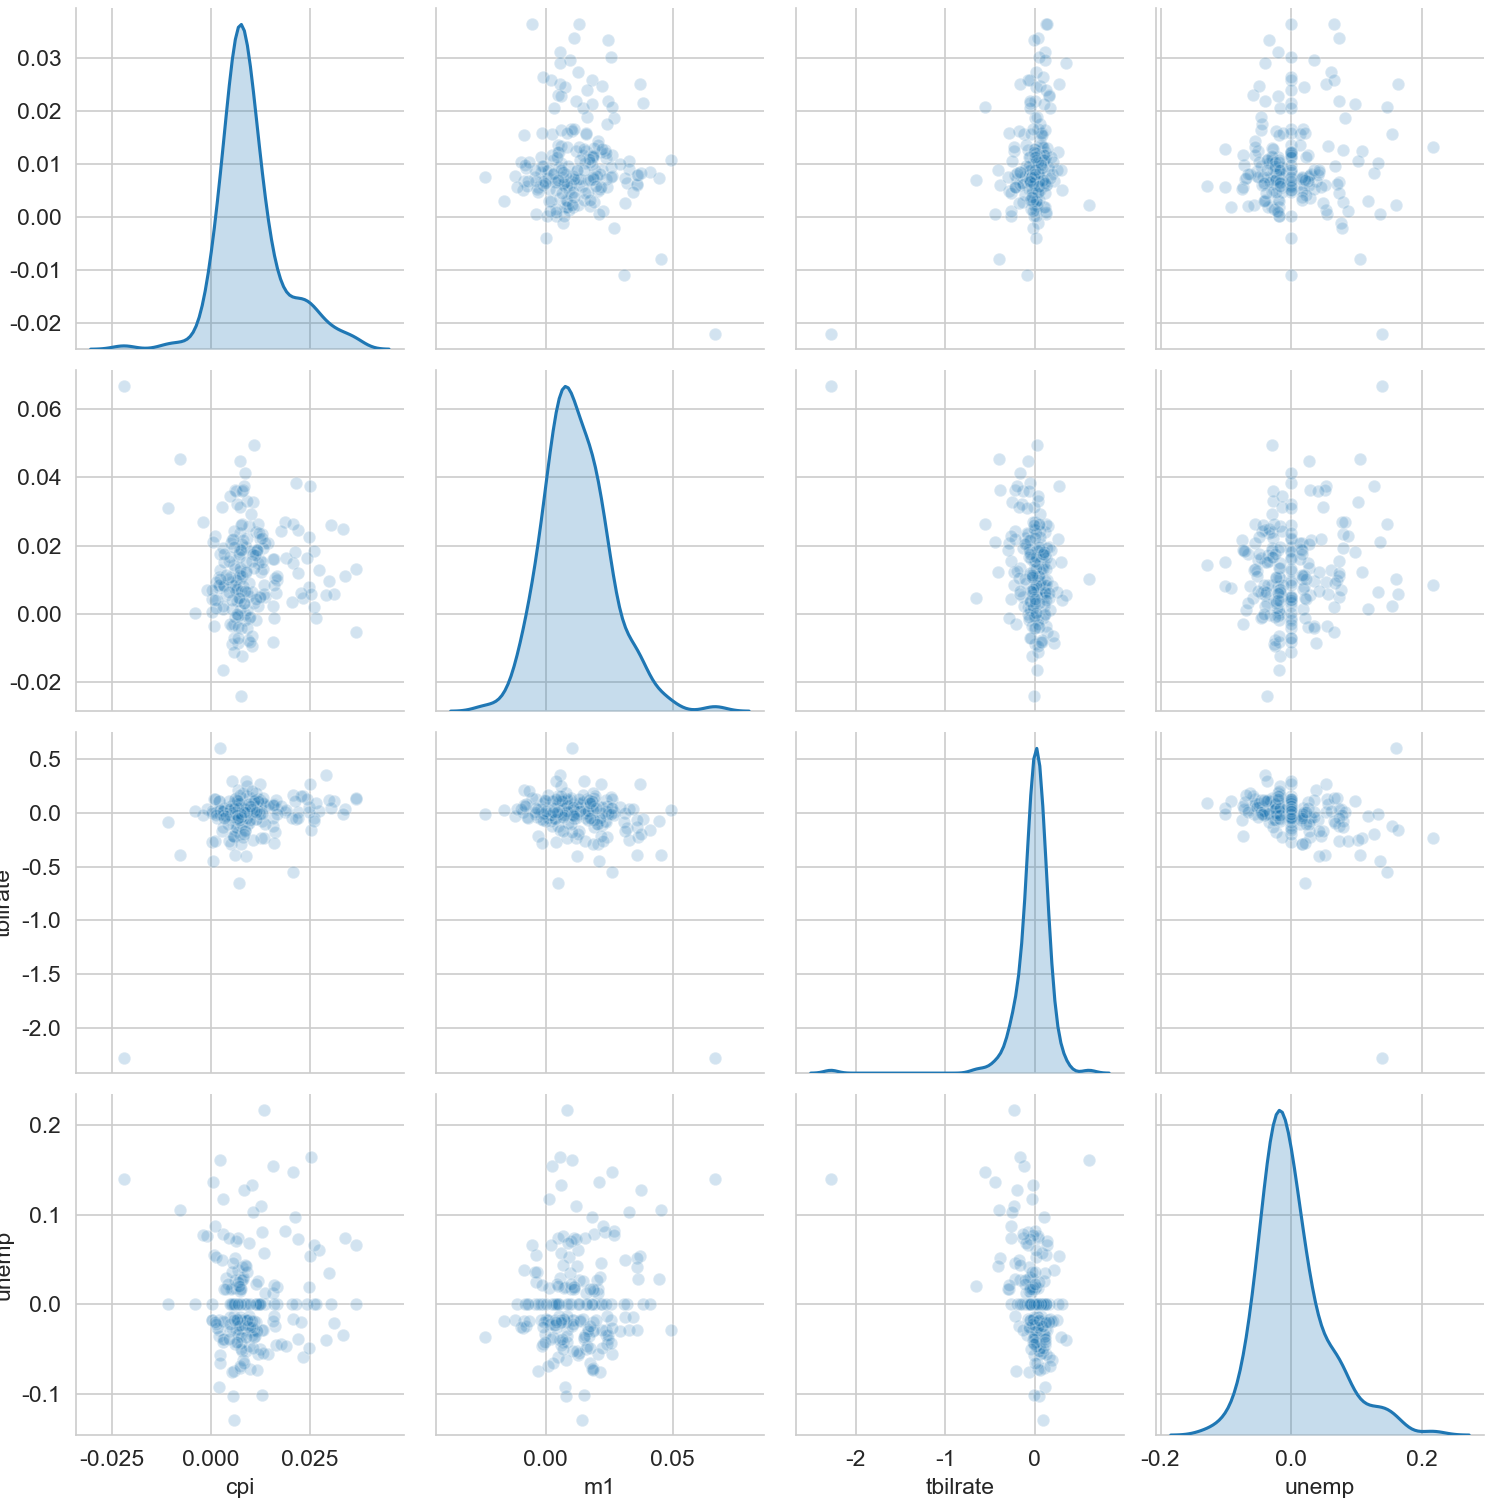

In [79]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})
plt.show()

## 网格和分类数据

因子变量-数值变量 的分布情况图Draw a categorical plot onto a FacetGrid.



```Python
seaborn.catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='point', size=4, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
```

<IPython.core.display.Javascript object>


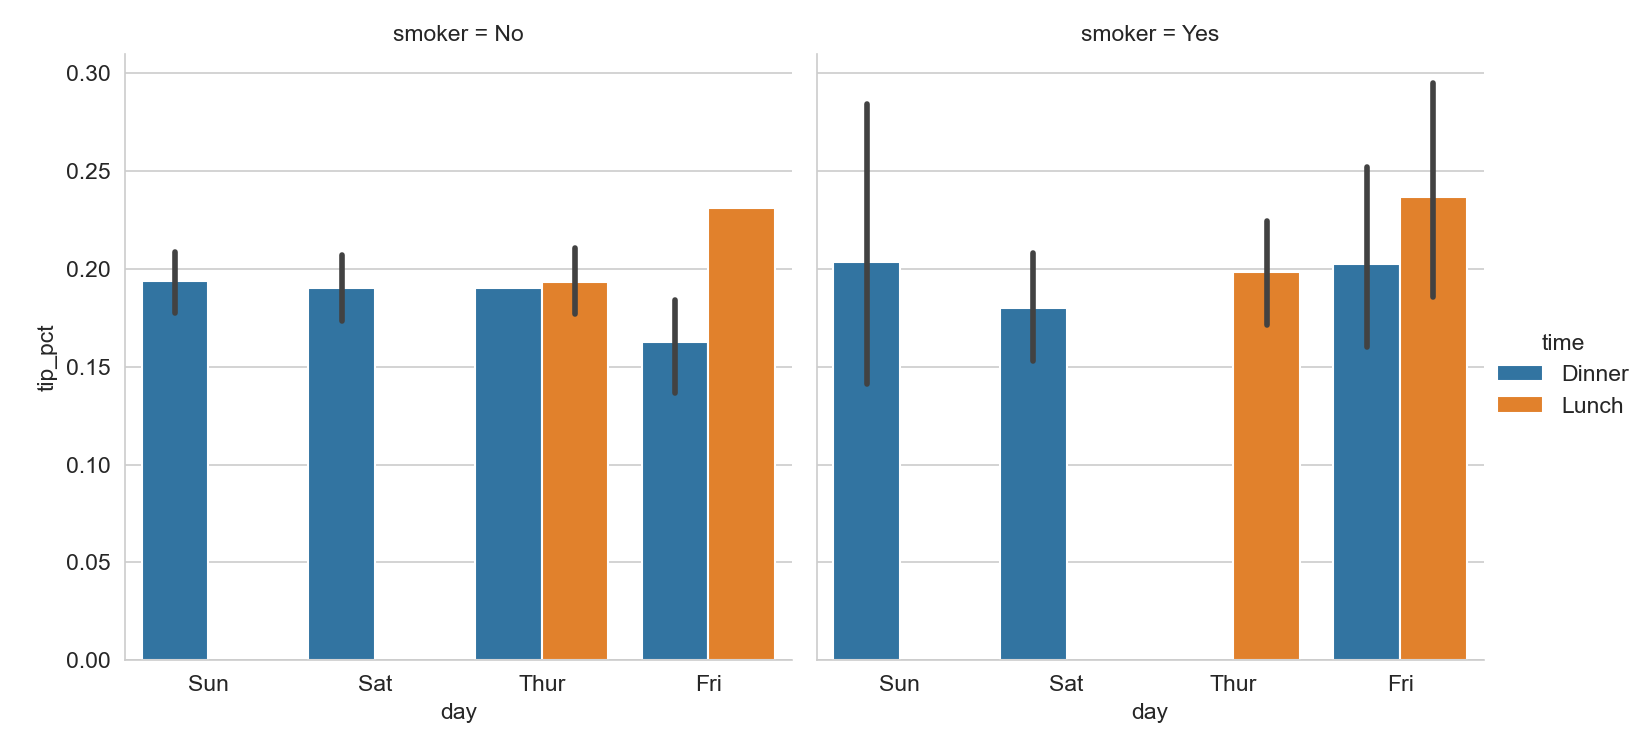

In [80]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])
plt.show()

<IPython.core.display.Javascript object>


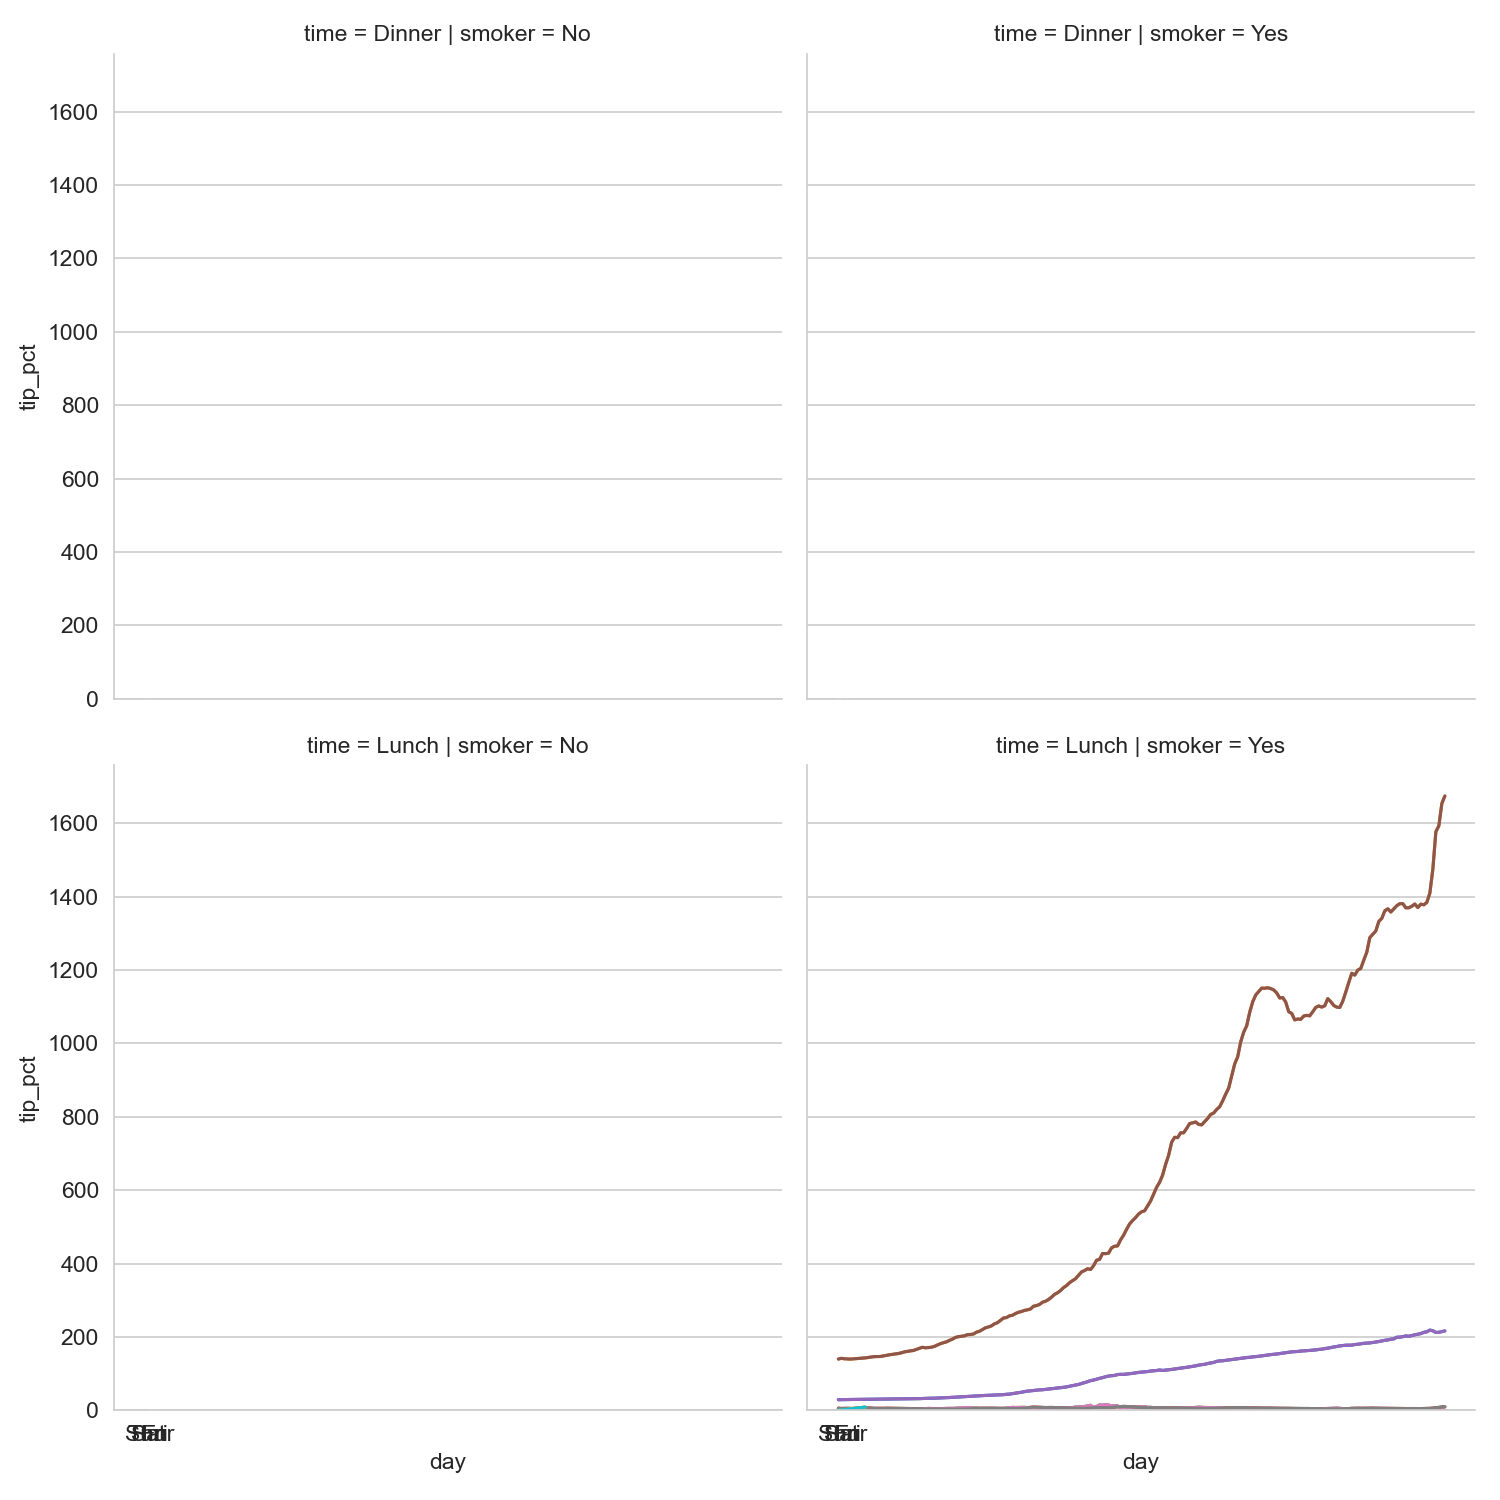

In [81]:
sns.catplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])
plt.show()

<IPython.core.display.Javascript object>


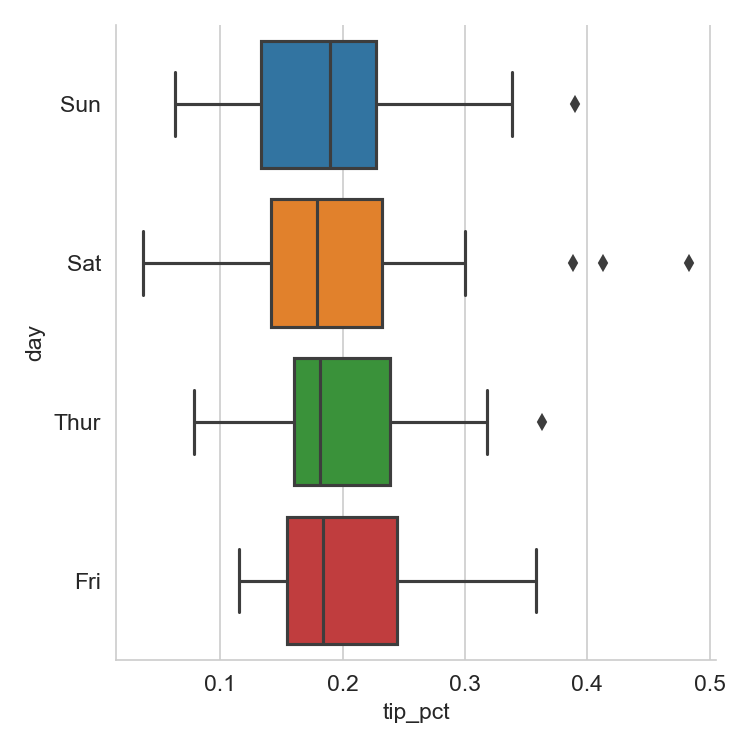

In [82]:
sns.catplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])
plt.show()

# 其他Python可视化工具

1. 绘制地图Basemap / Cartopy 

## Conclusion